In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
data_path = r"C:\Users\HP\Desktop\Springboard\data.csv"

In [4]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Internship\day.csv", encoding= 'unicode_escape')


## DATA INSPECTION

In [5]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [6]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [12]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
dataset['Month'] = dataset['dteday'].dt.month

dataset['Day'] = dataset['dteday'].dt.day_name()    

In [16]:
dataset['Weekdays_or_weekend'] = dataset['dteday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   dteday               731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   yr                   731 non-null    int64         
 4   mnth                 731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temp                 731 non-null    float64       
 10  atemp                731 non-null    float64       
 11  hum                  731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

In [18]:
dataset.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,Saturday,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,Sunday,0


In [19]:
dataset.drop(['dteday',"Day"],axis=1 ,inplace=True)

In [20]:
dataset.head(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0


In [21]:
dataset['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [22]:
dataset['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [23]:
dataset['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [24]:
dataset['Month'].value_counts()

Month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [25]:
dataset['Weekdays_or_weekend'].value_counts()

Weekdays_or_weekend
0    731
Name: count, dtype: int64

In [26]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,6.519836,0.0
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,3.451913,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000,0.0
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,4.000000,0.0
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,7.000000,0.0
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,10.000000,0.0
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,12.000000,0.0


In [27]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis


In [28]:
numeric_features = dataset.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

In [29]:
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

[]

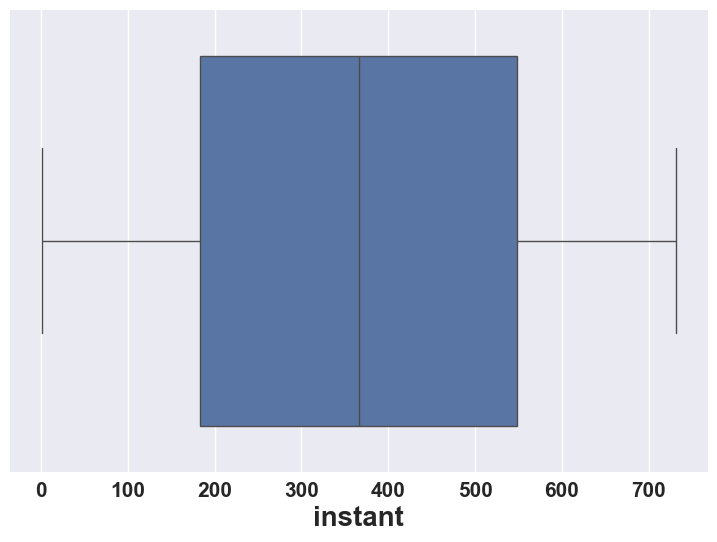

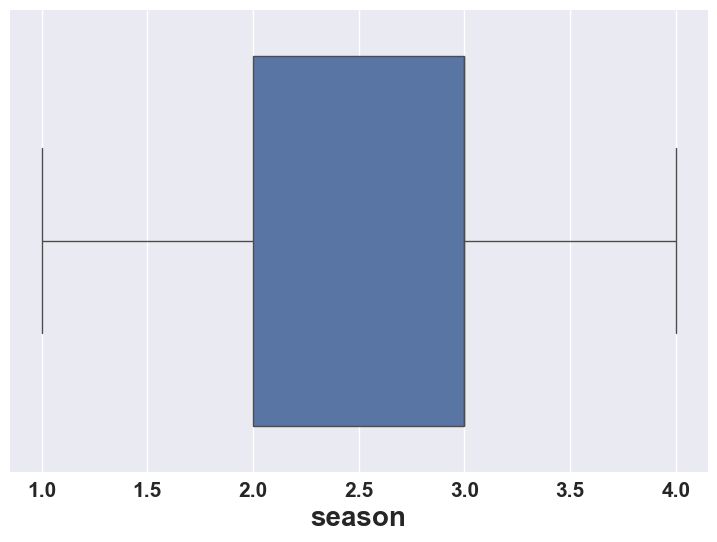

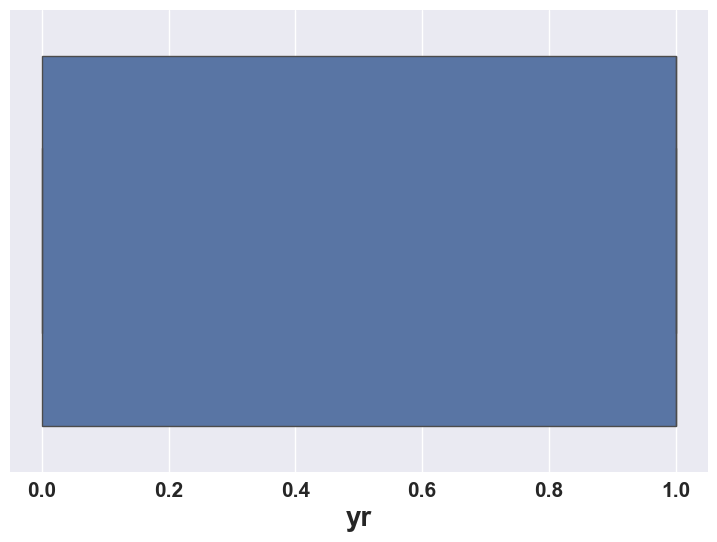

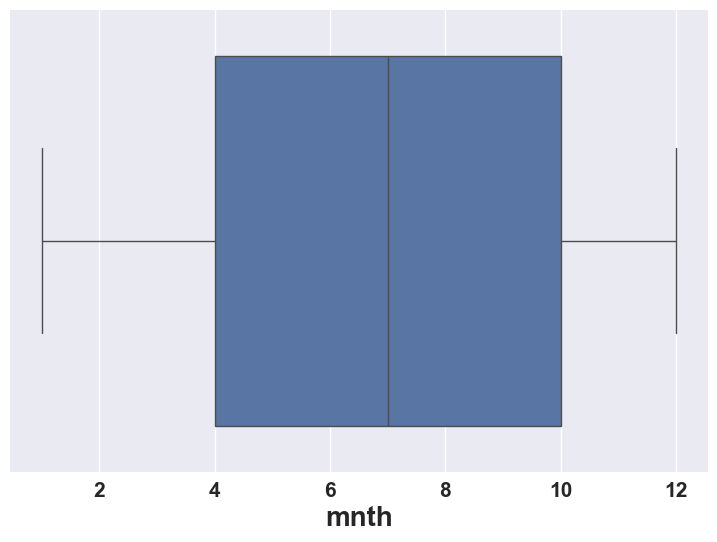

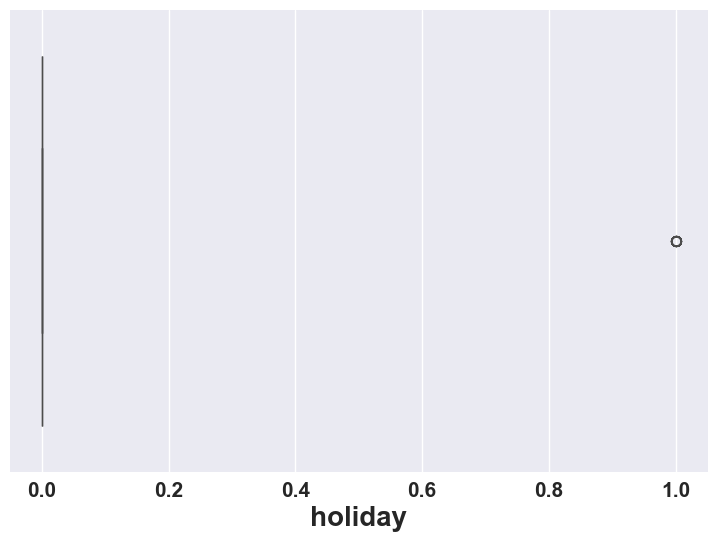

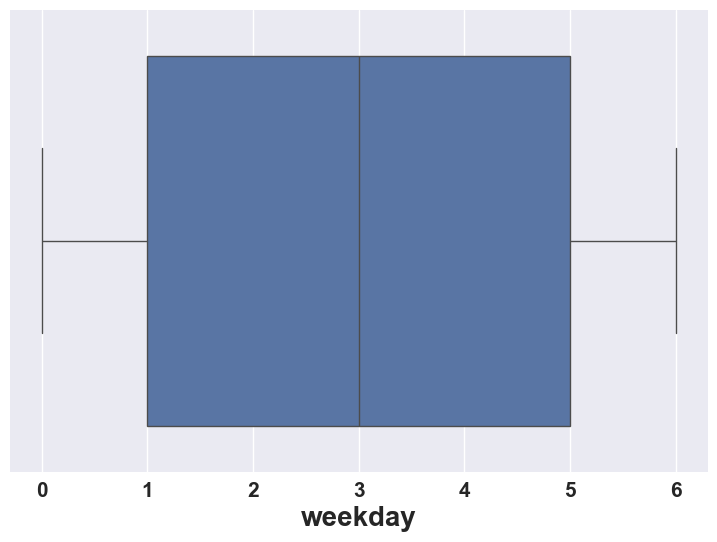

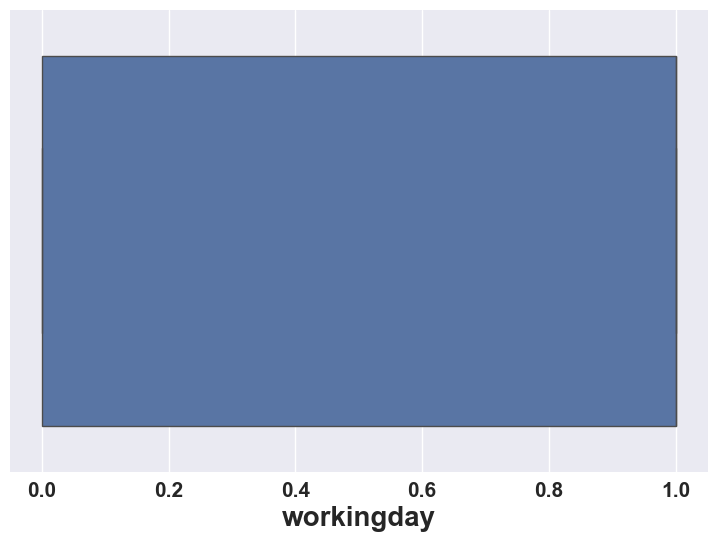

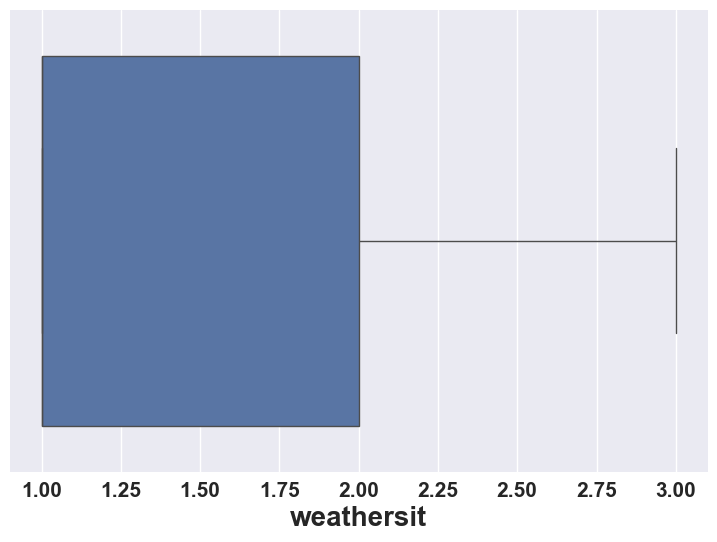

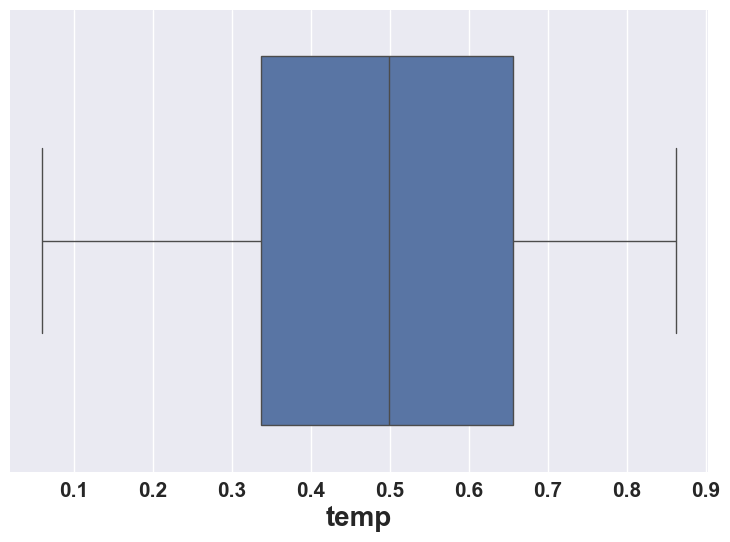

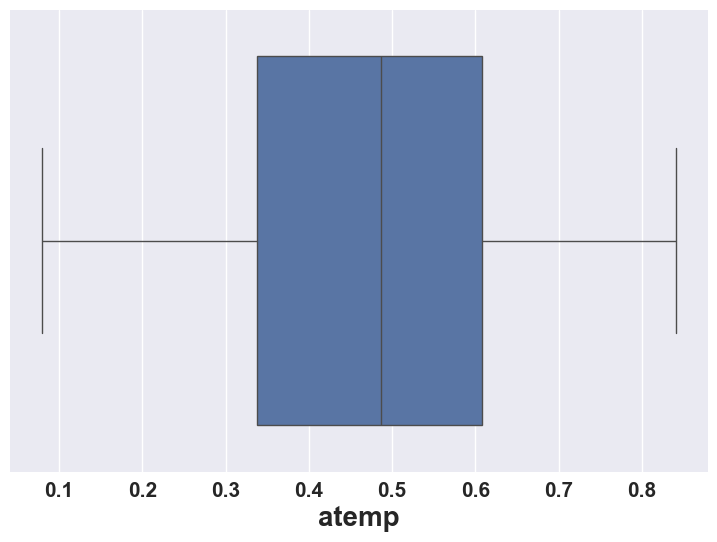

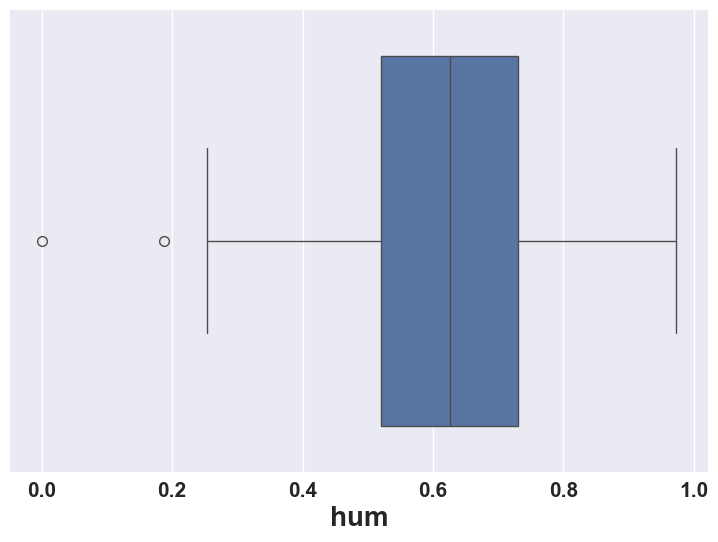

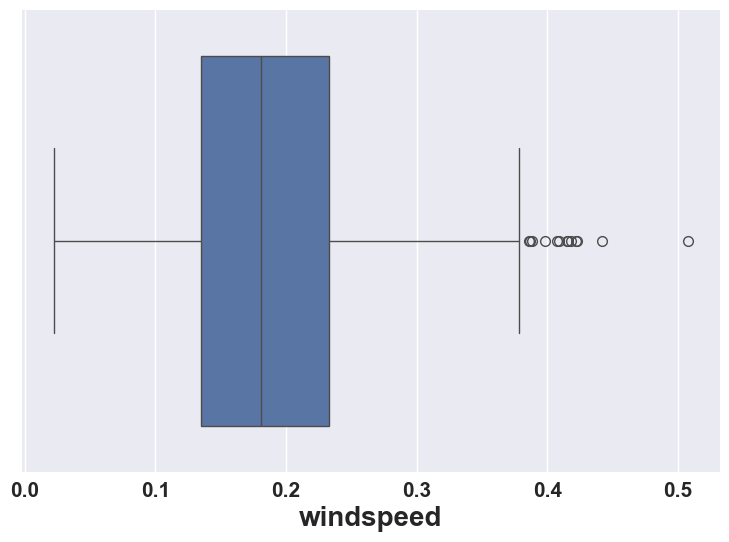

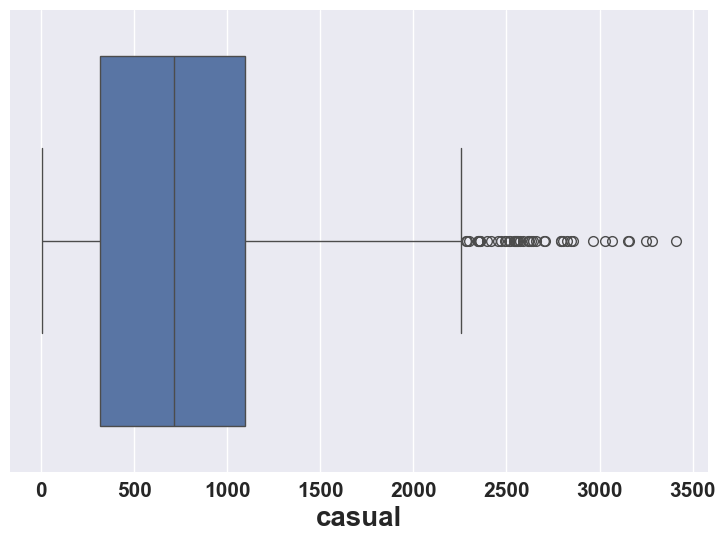

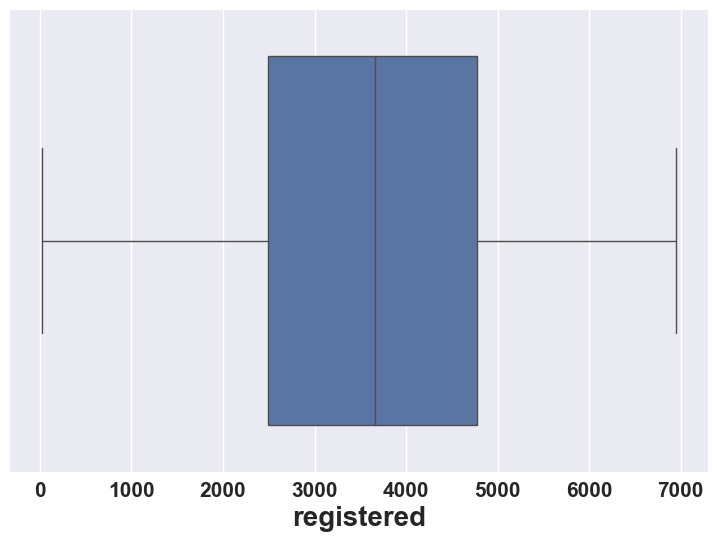

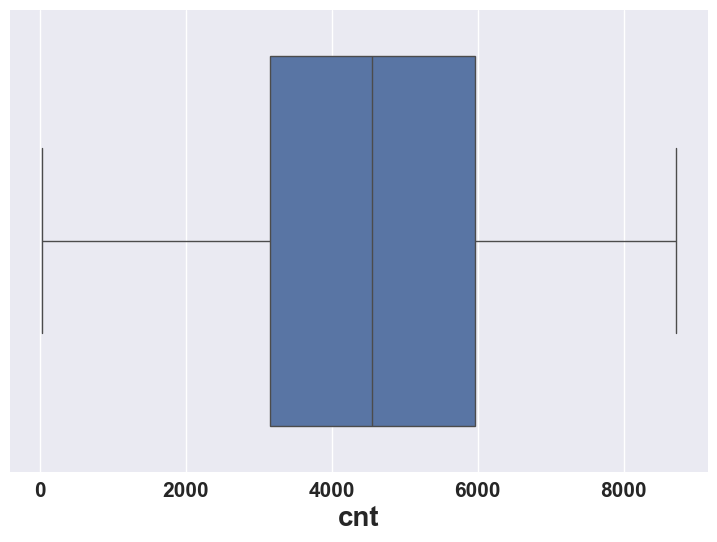

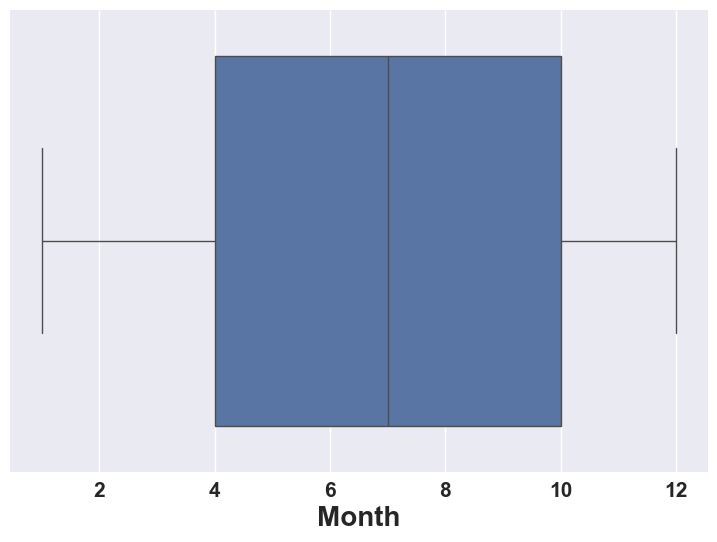

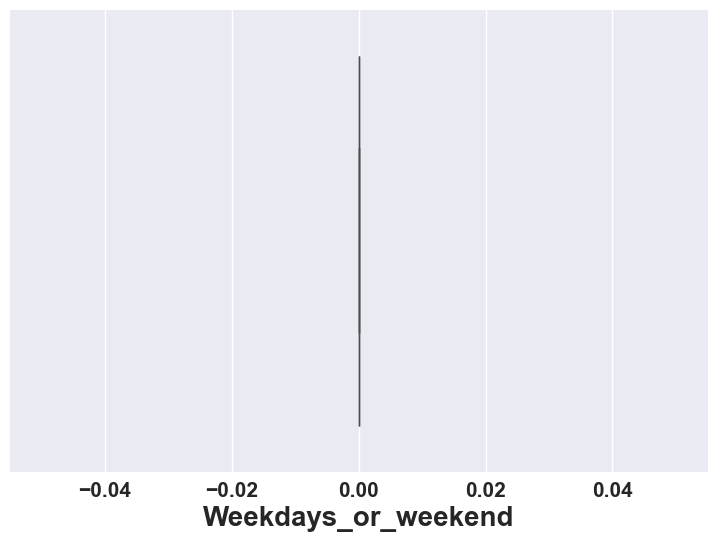

In [30]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

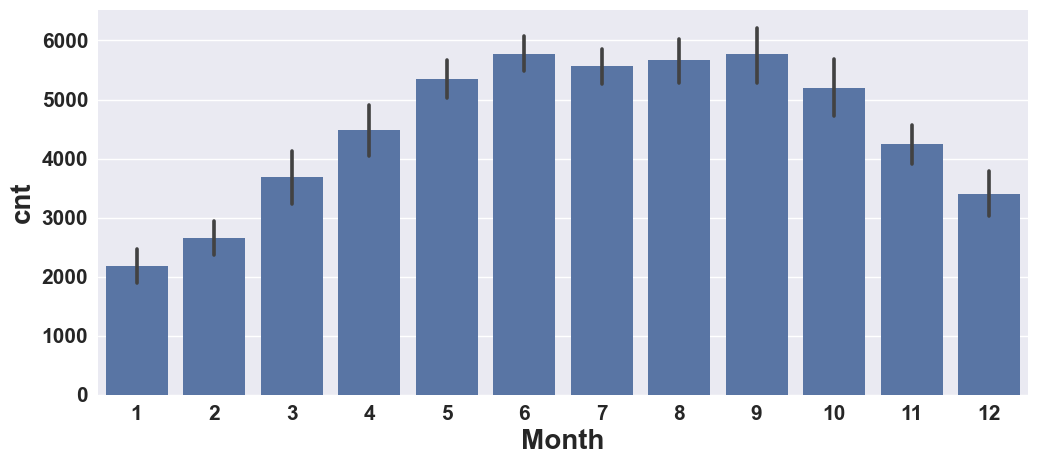

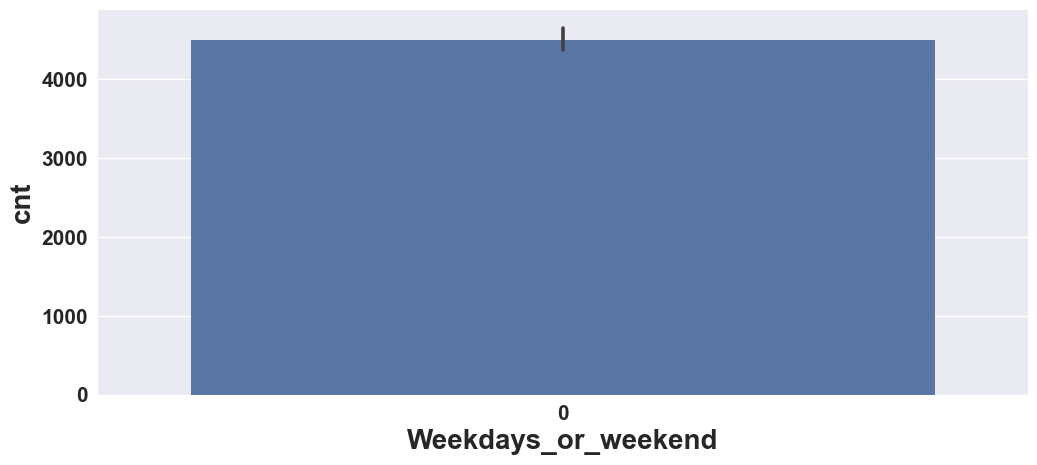

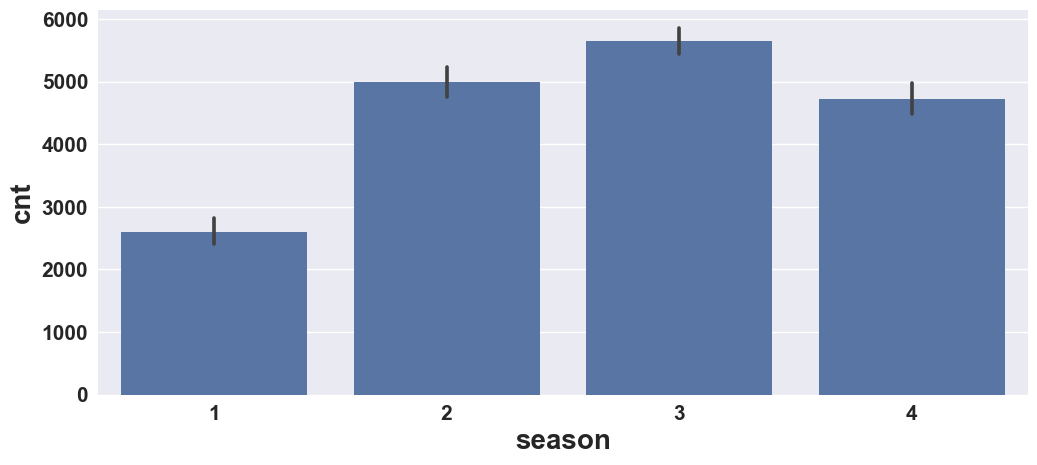

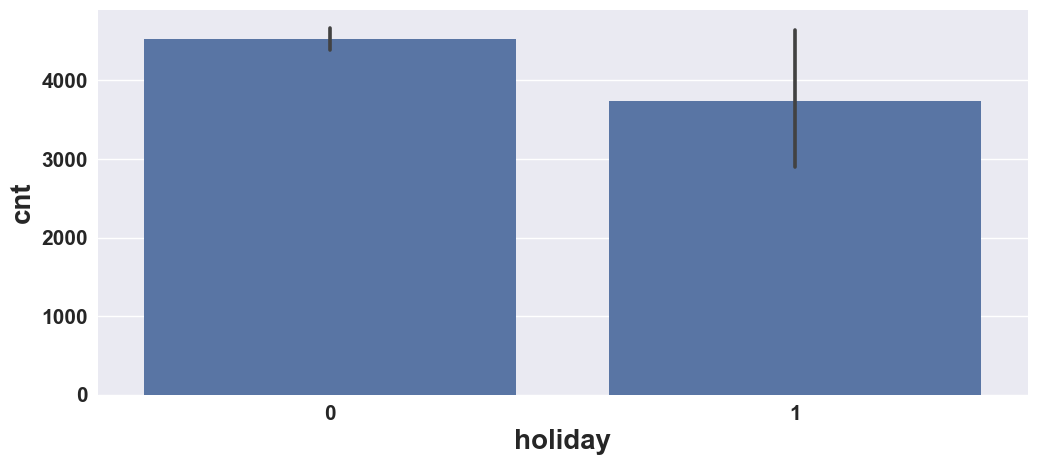

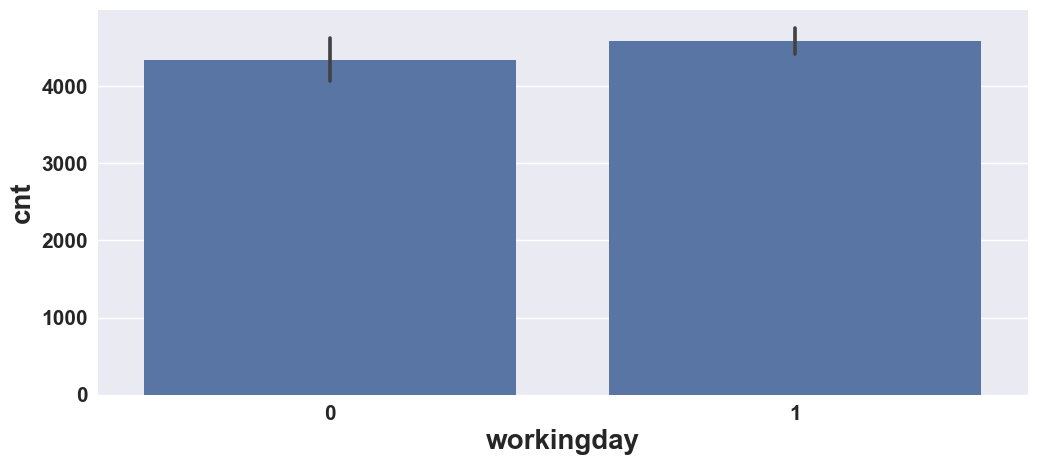

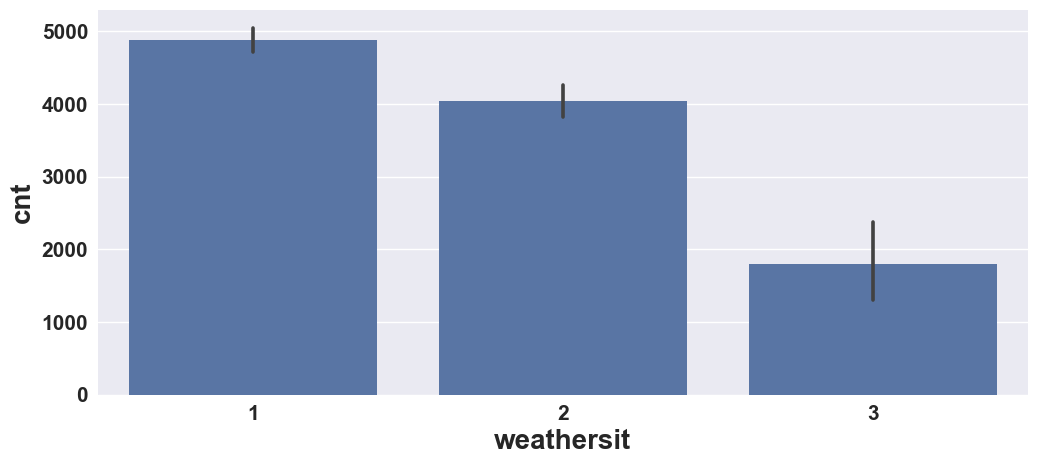

In [31]:
categorical_columns.extend(['Month','Weekdays_or_weekend','season','holiday','workingday', 'weathersit'])

for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

## Observations from Above Charts :-

## 1 . Fall season had the higest Bike Rent Count. People are more likely to rent bikes in Fall. Bike rentals in Spring is very less compared to other seasons.
## 2 . High number of bikes were rented on Holidays. 
## 3 . Most of the bikes were rented on Weekdays compared to weekends.
## 4 . From March Bike Rent Count started increasing and it was highest in June.

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

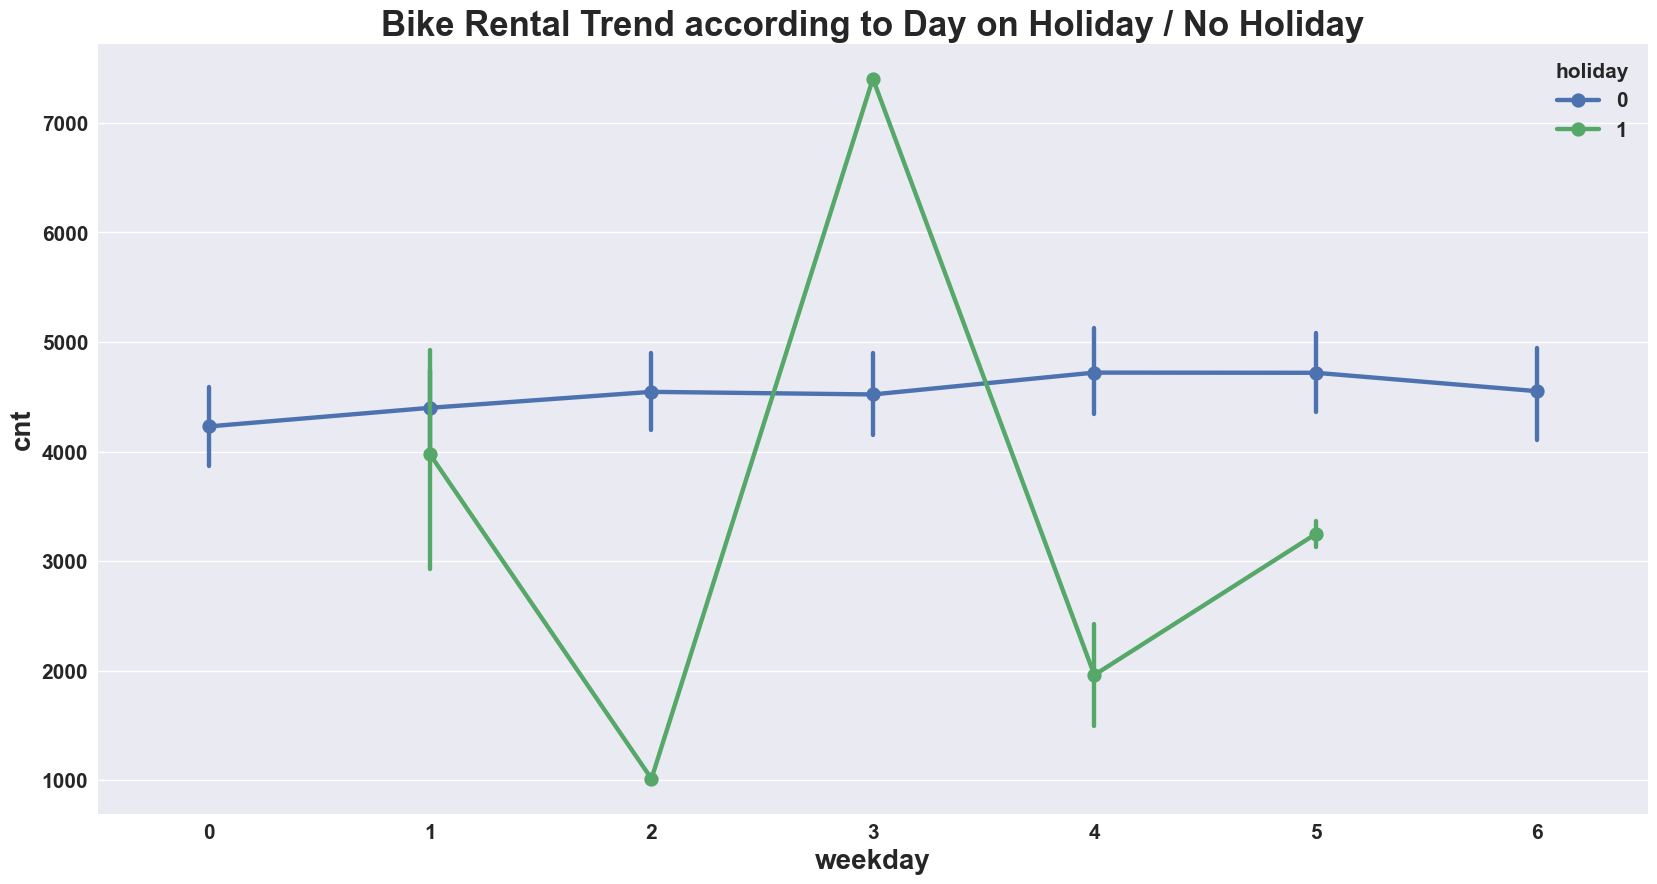

In [32]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to day on Holiday / No Holiday')

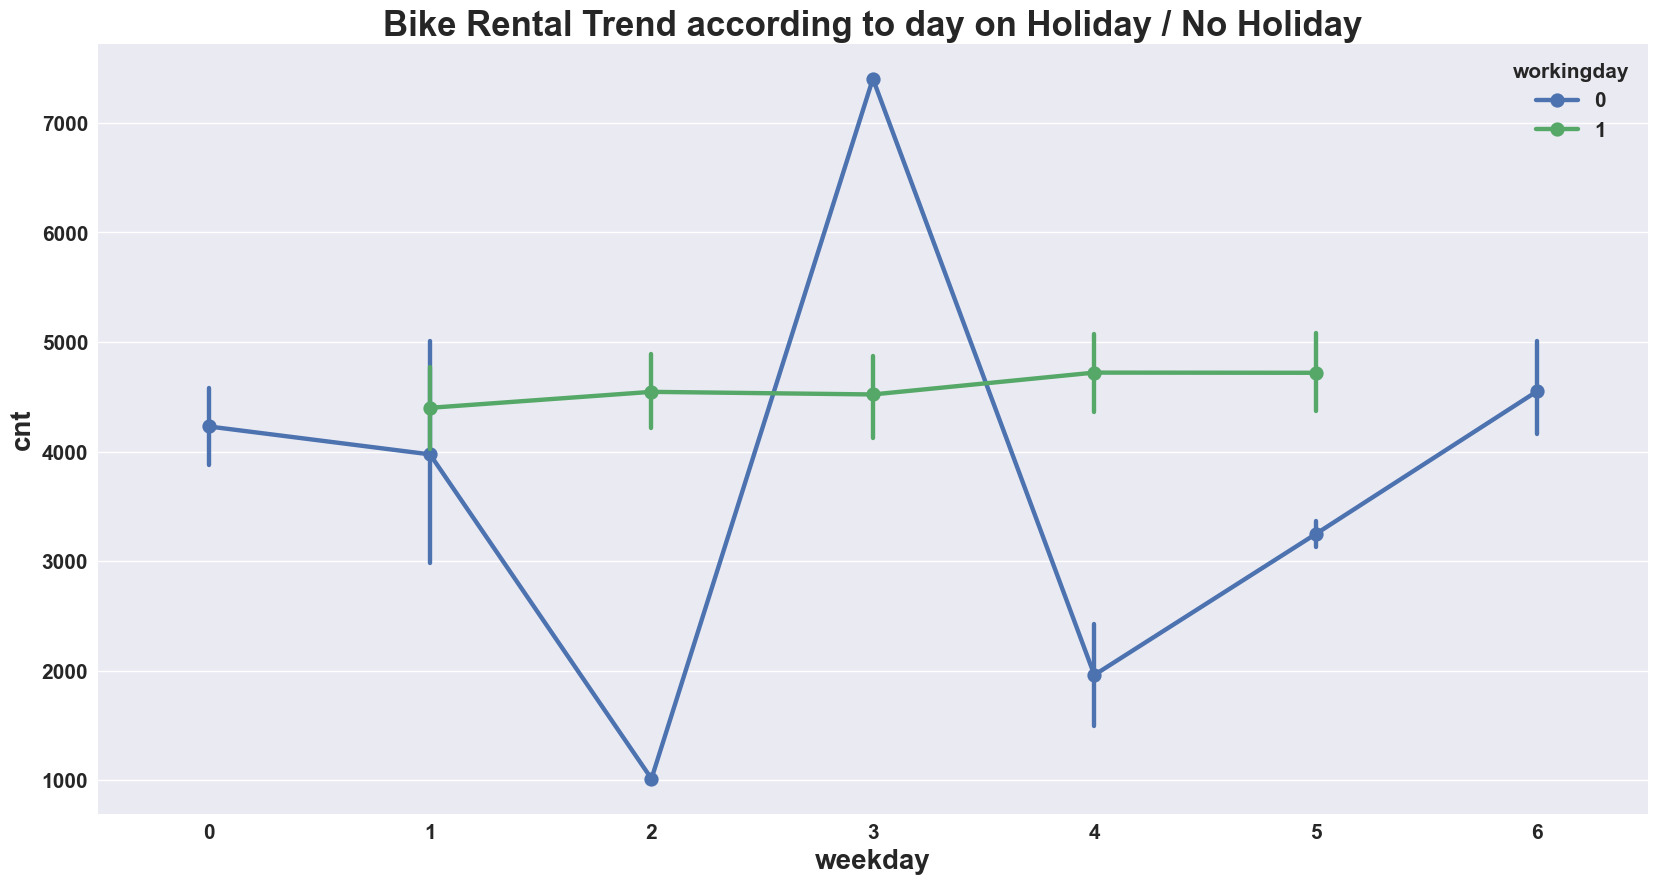

In [33]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to day on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

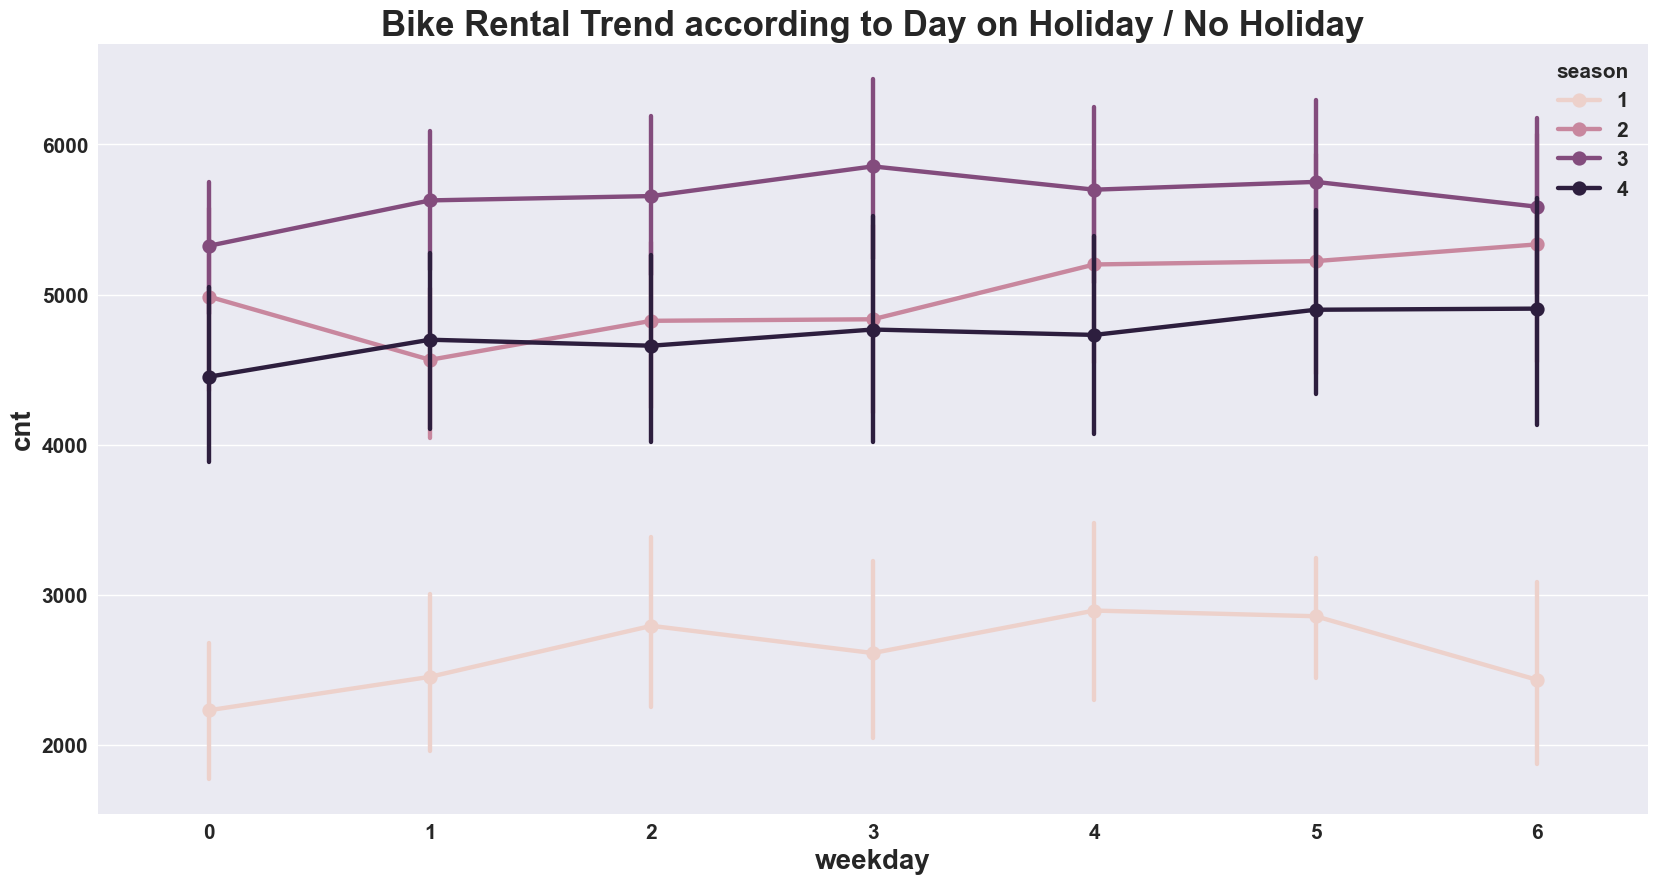

In [34]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

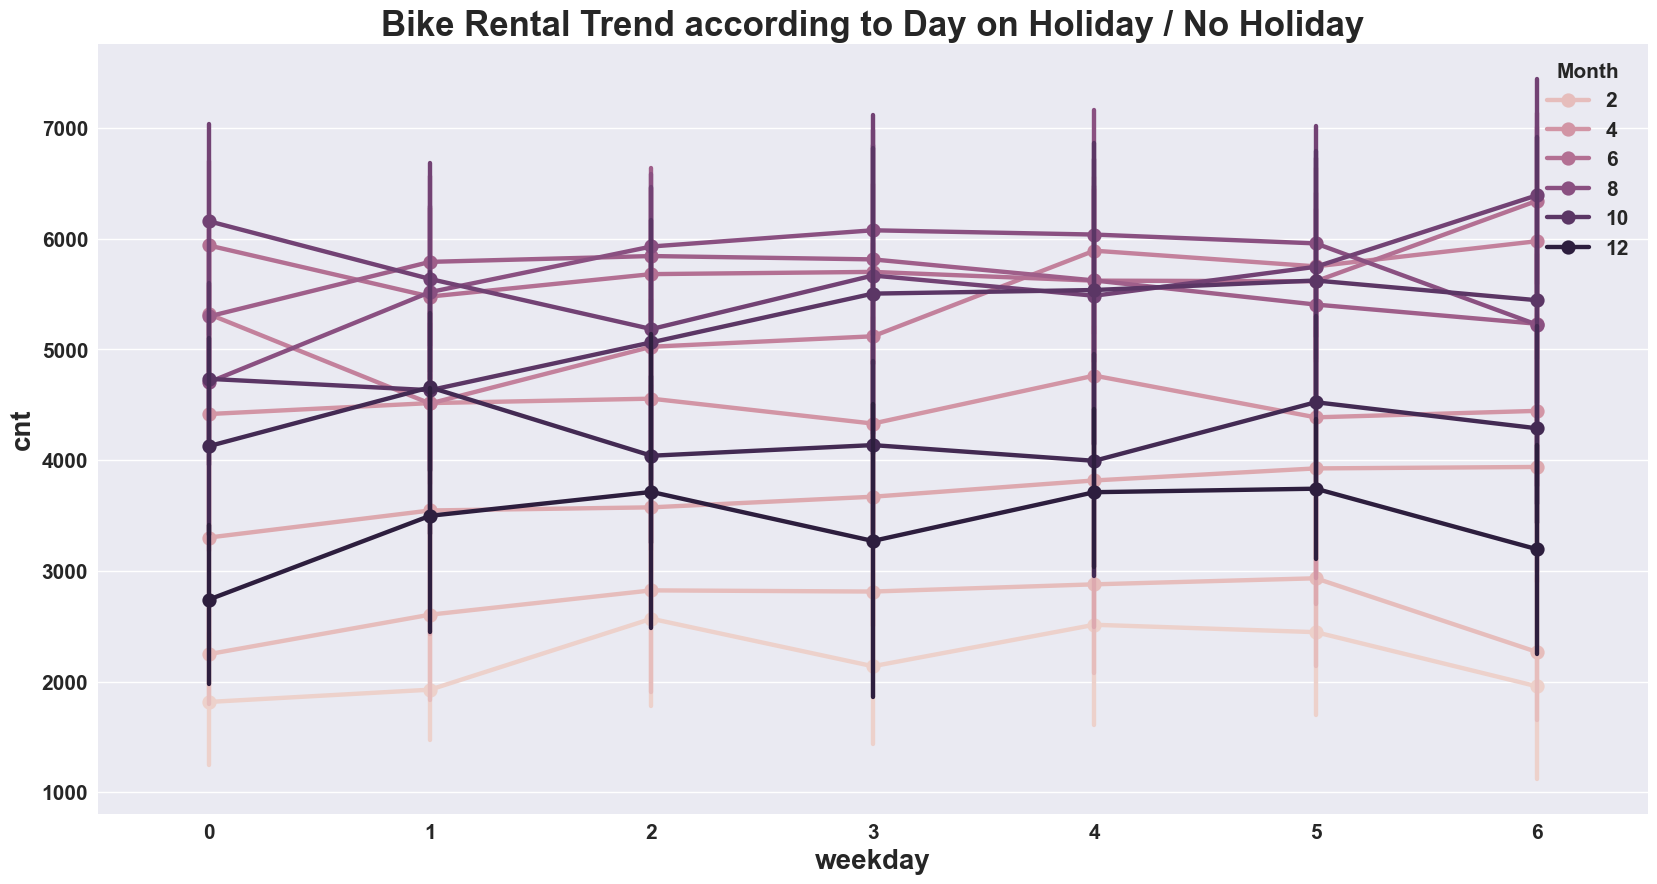

In [35]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['Month'])
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

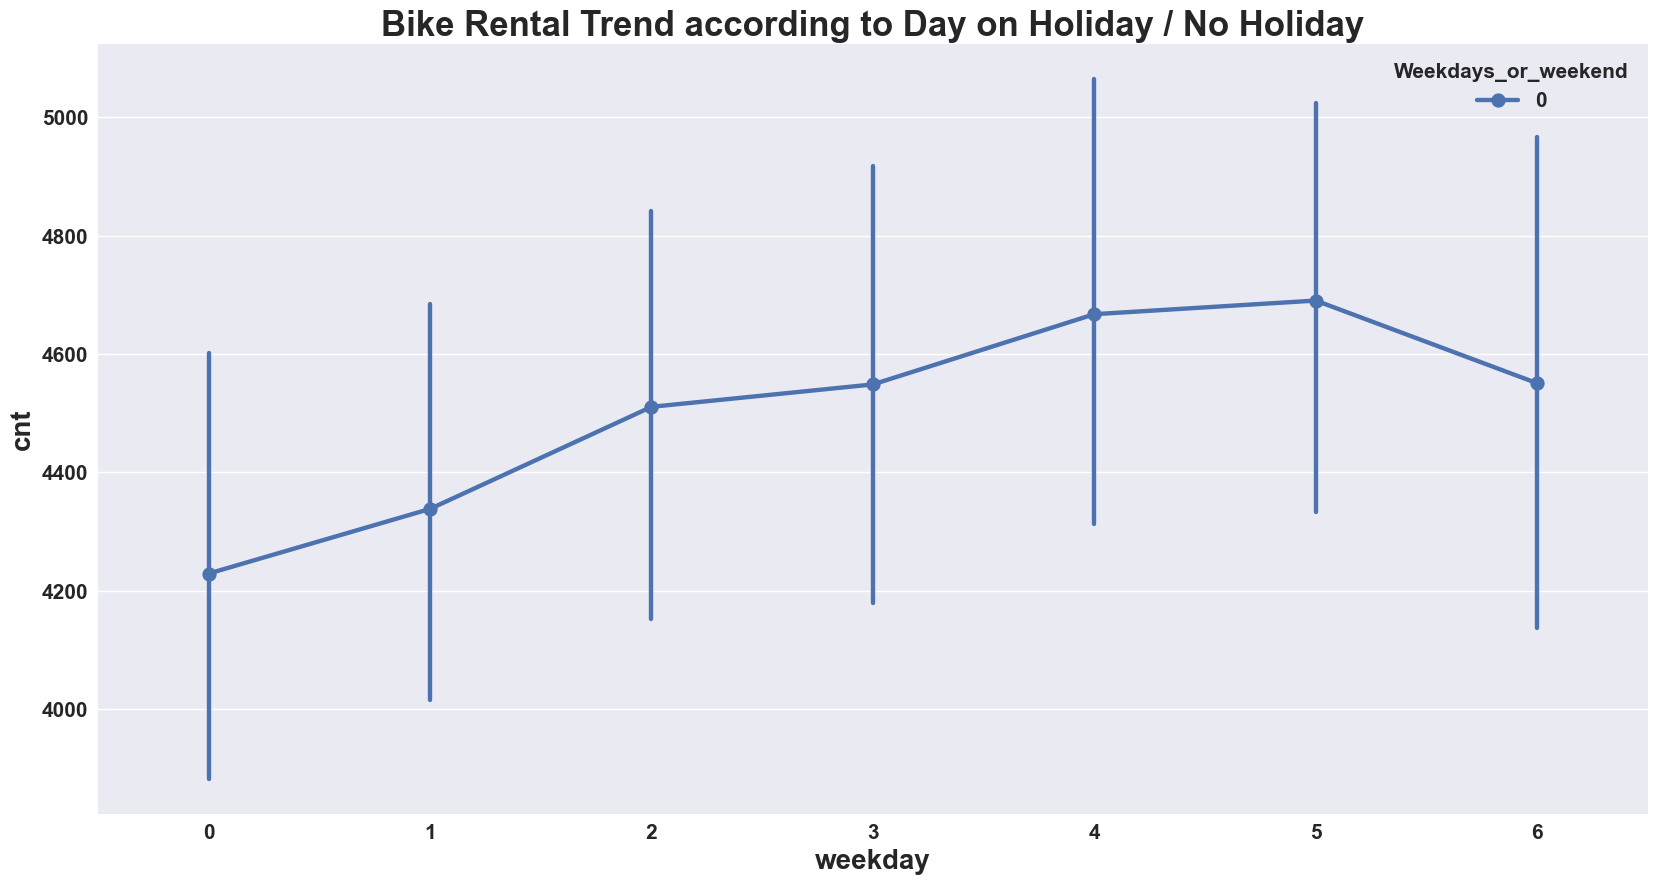

In [36]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

## Distribution of Target Variable

<Axes: xlabel='cnt'>

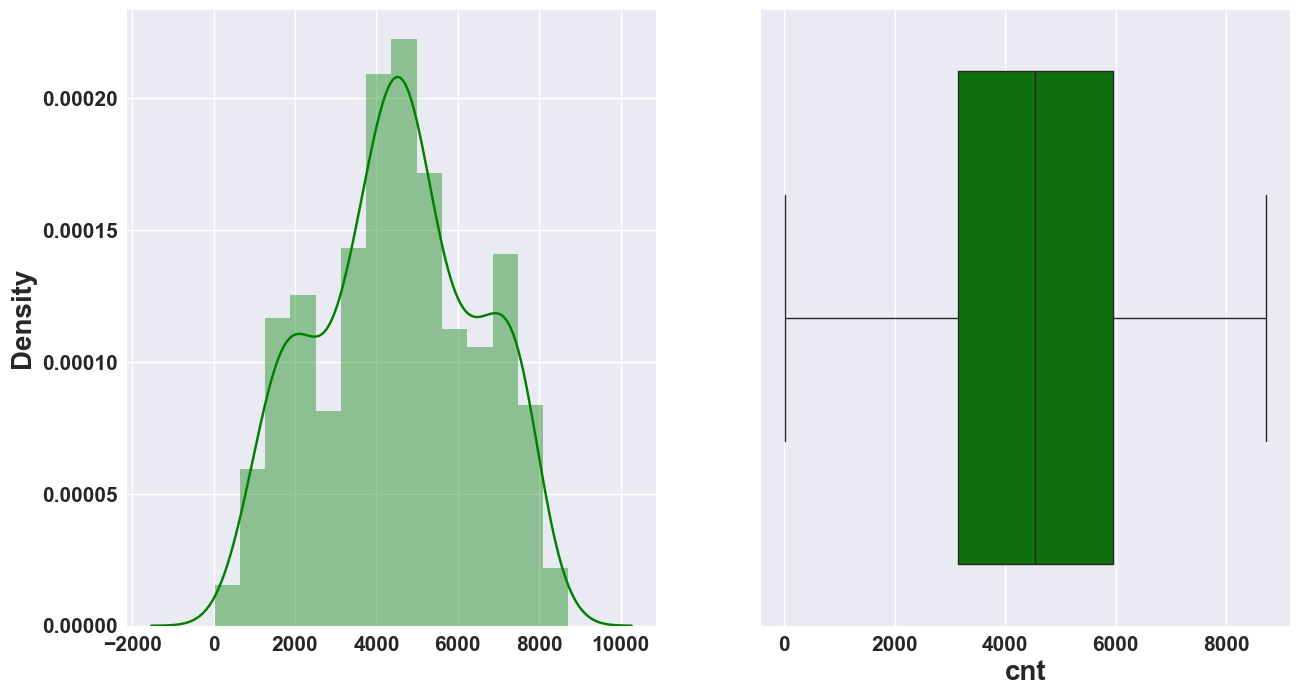

In [37]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

<Axes: xlabel='cnt'>

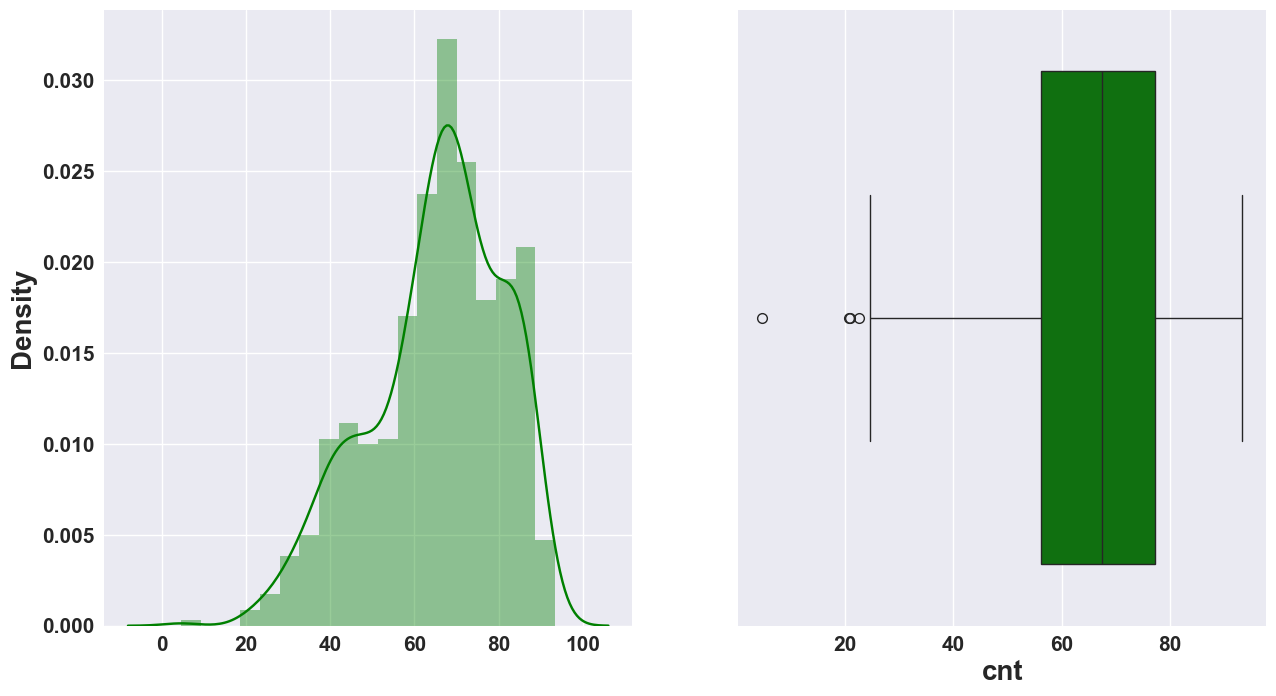

In [38]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(dataset['cnt']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(dataset['cnt']),color='g',ax=axes[1])

### Univariate Analysis

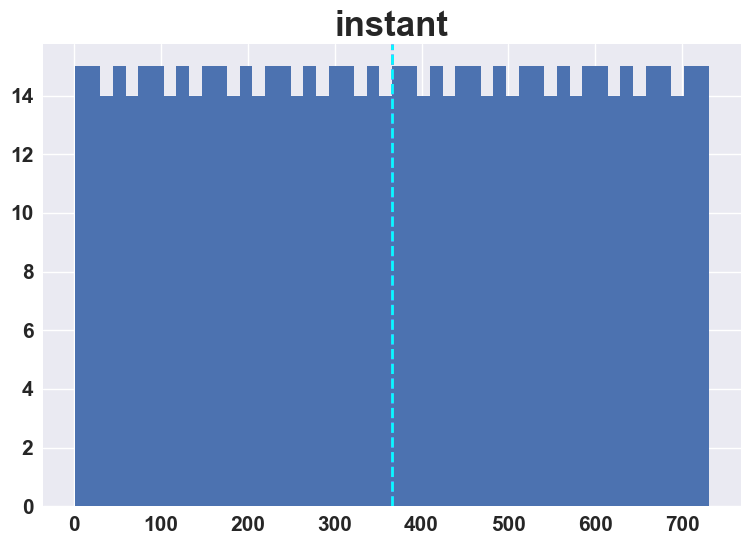

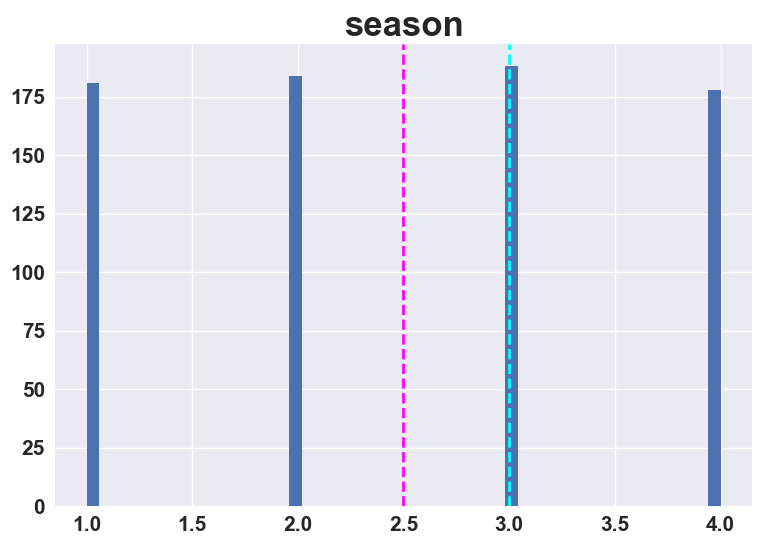

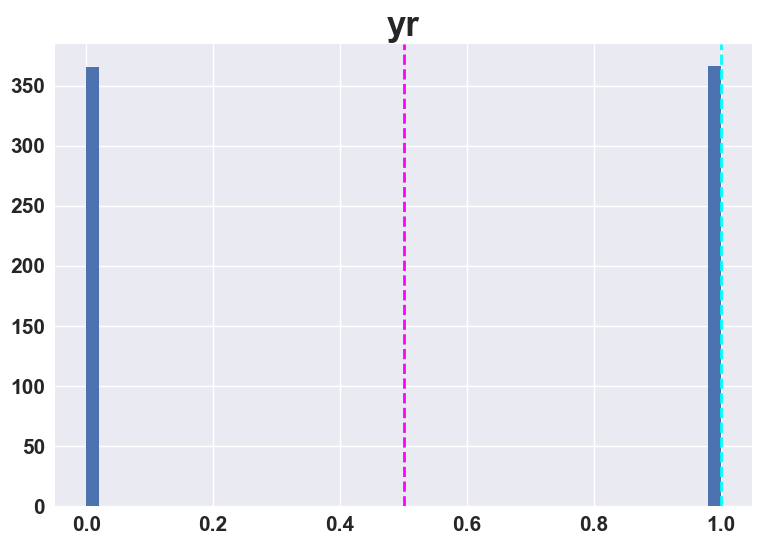

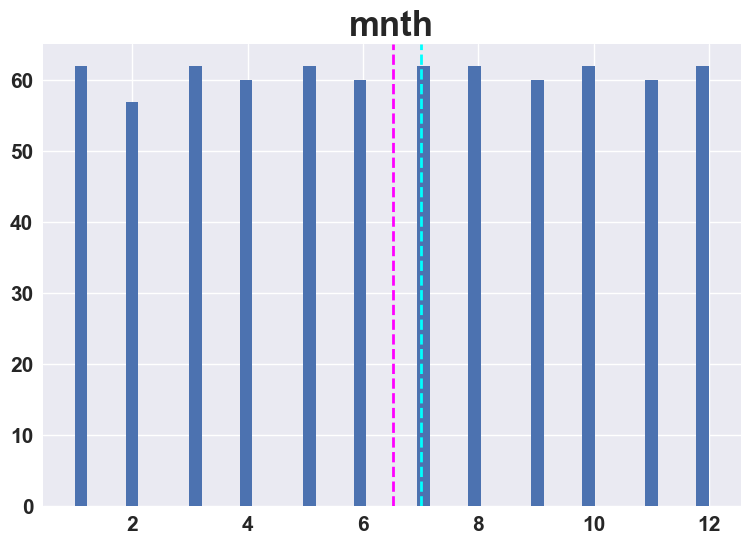

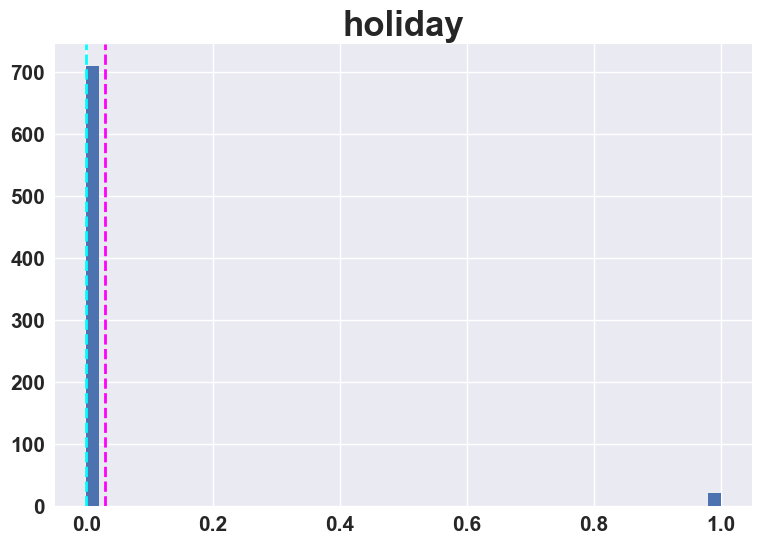

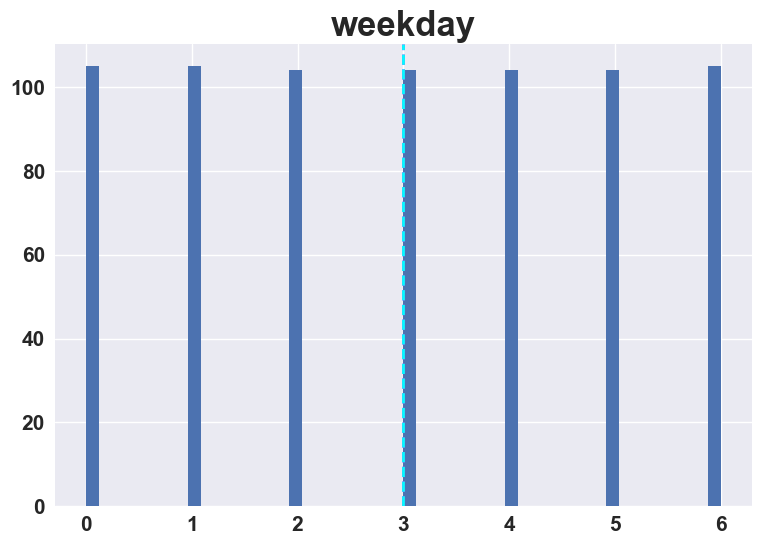

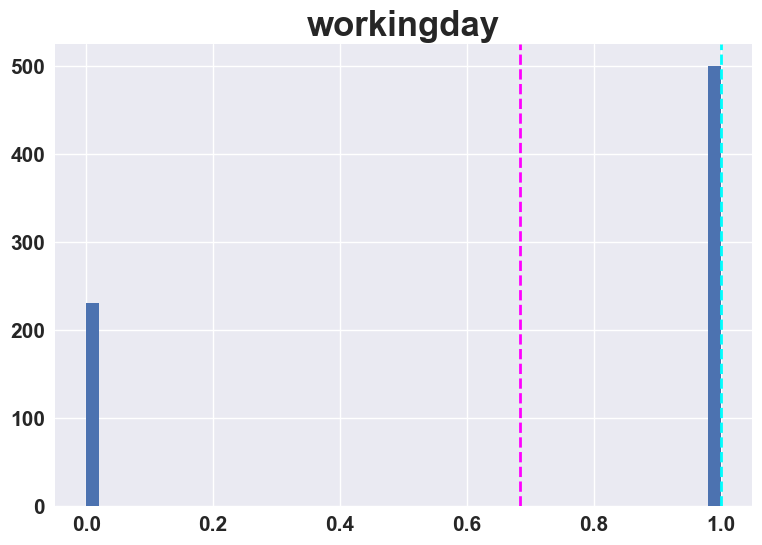

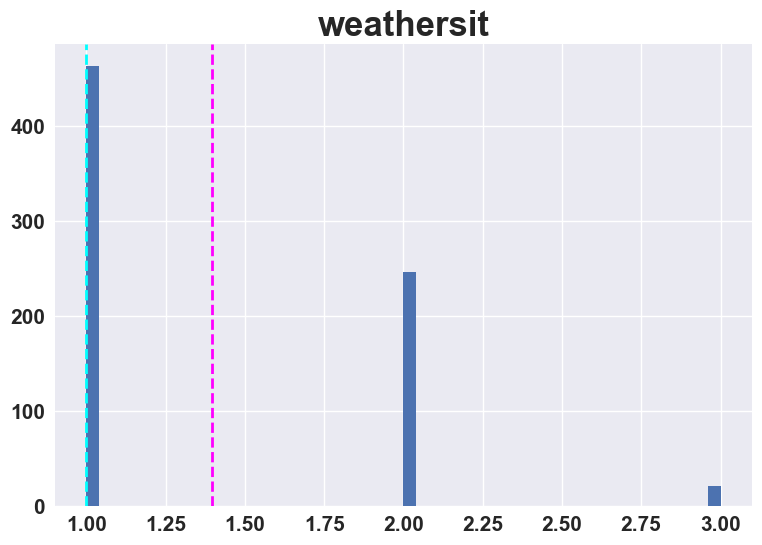

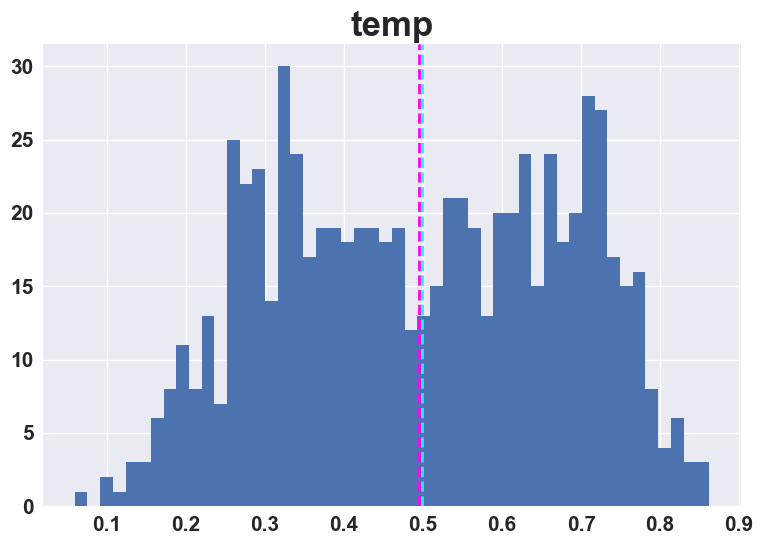

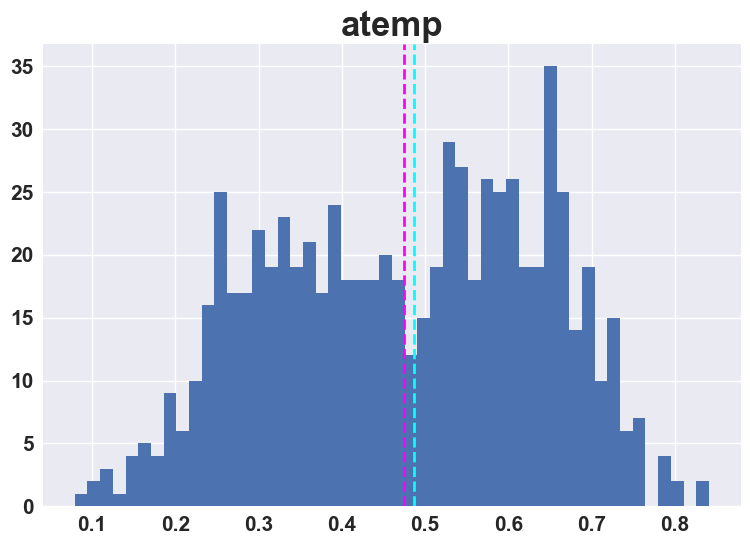

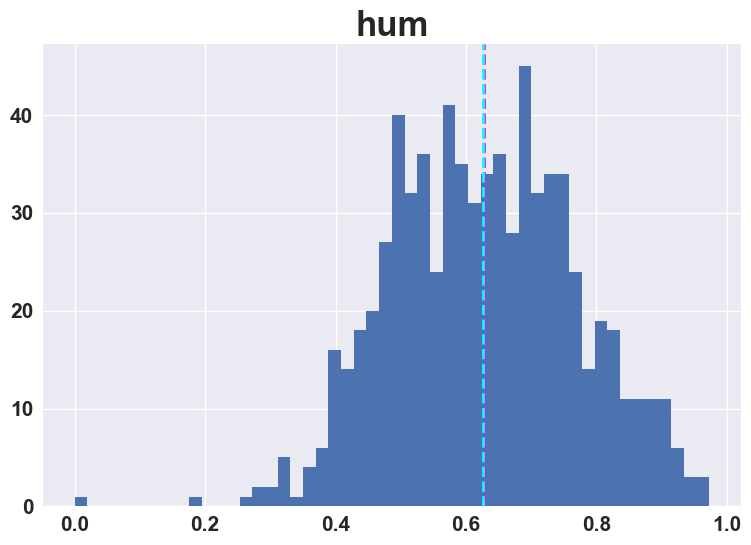

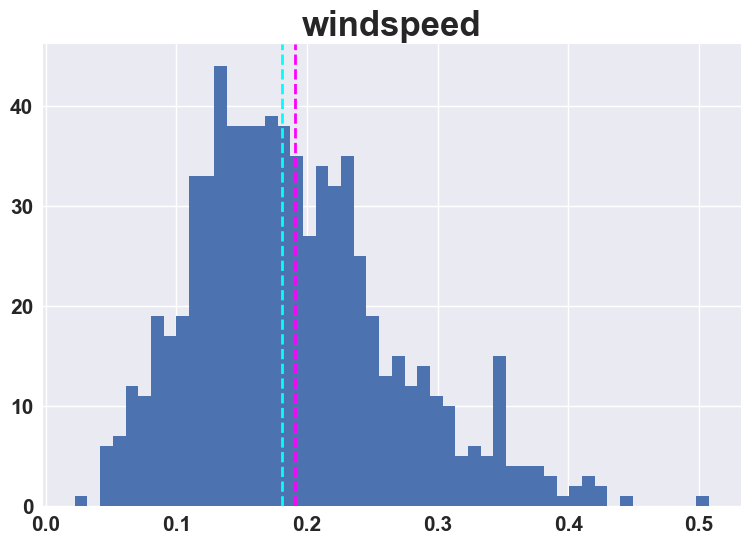

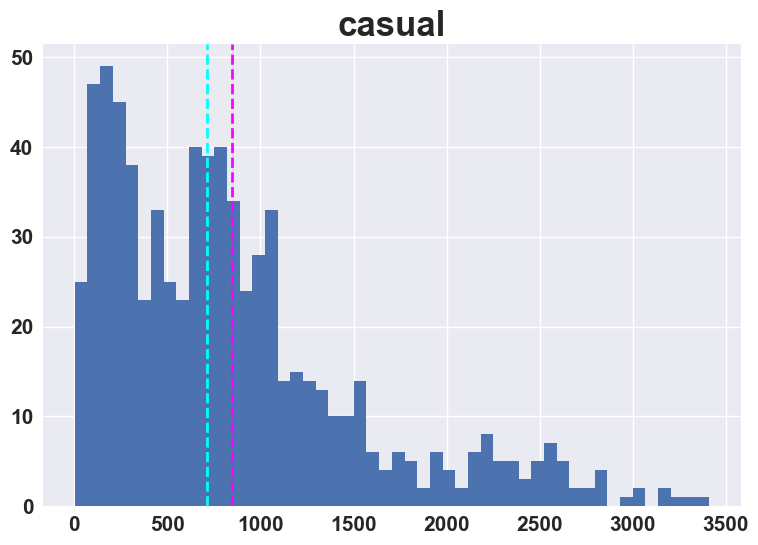

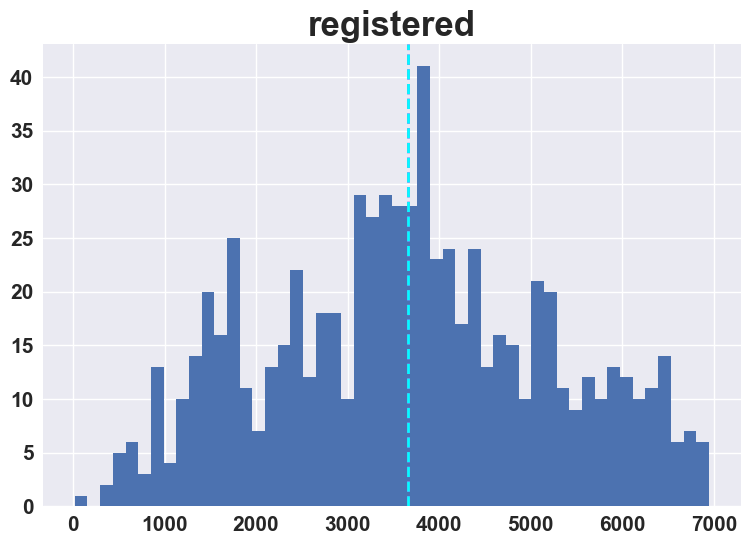

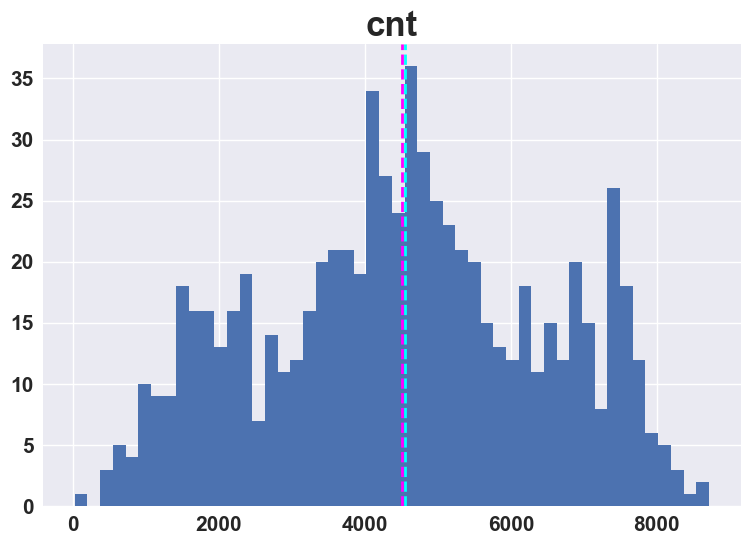

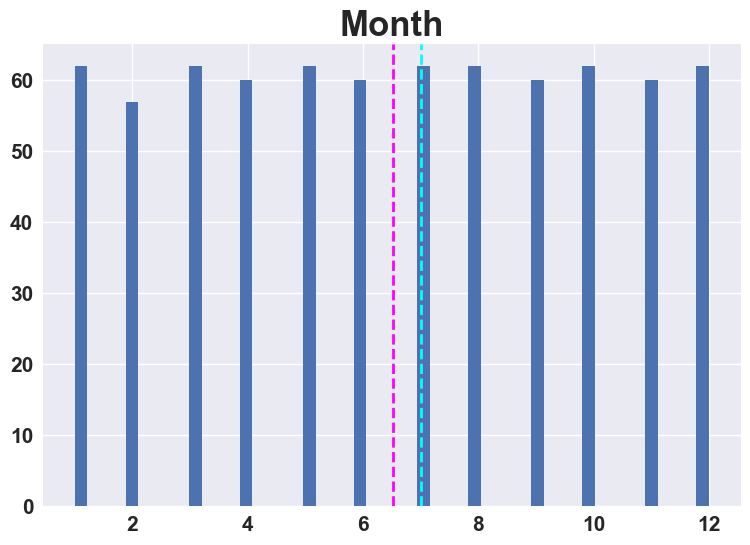

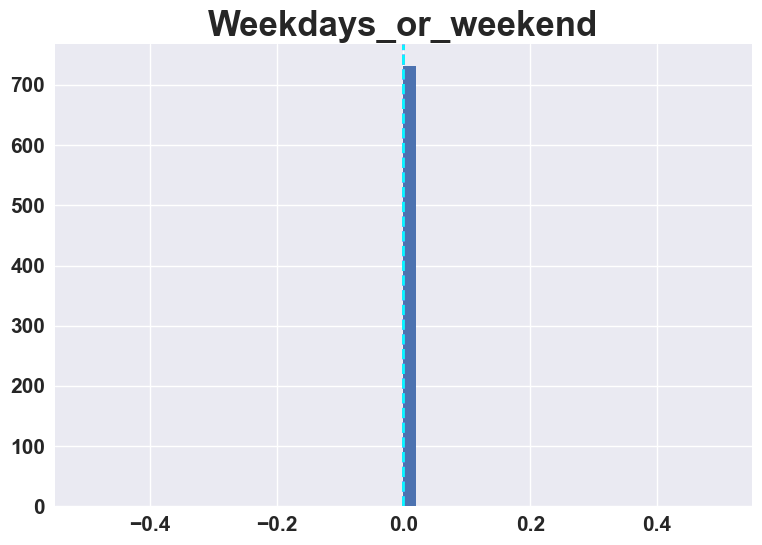

In [39]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

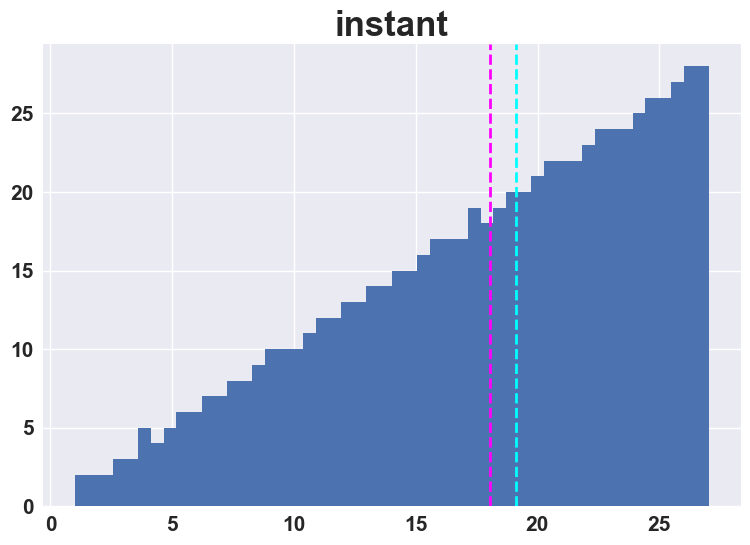

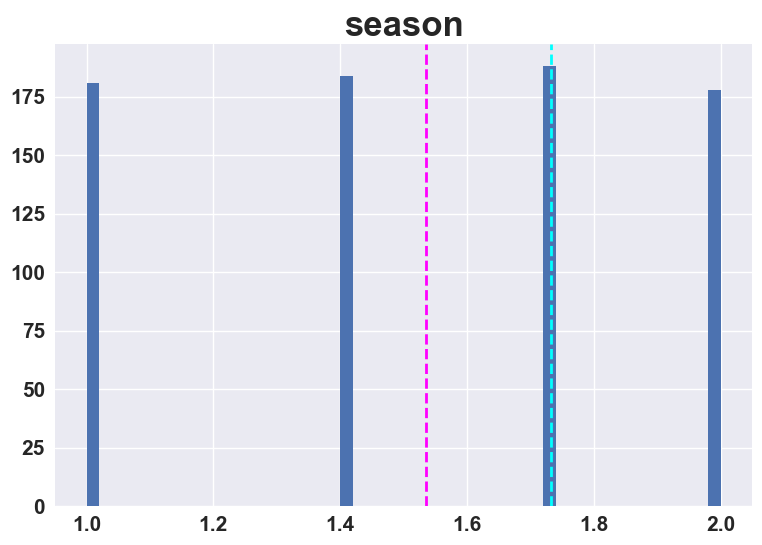

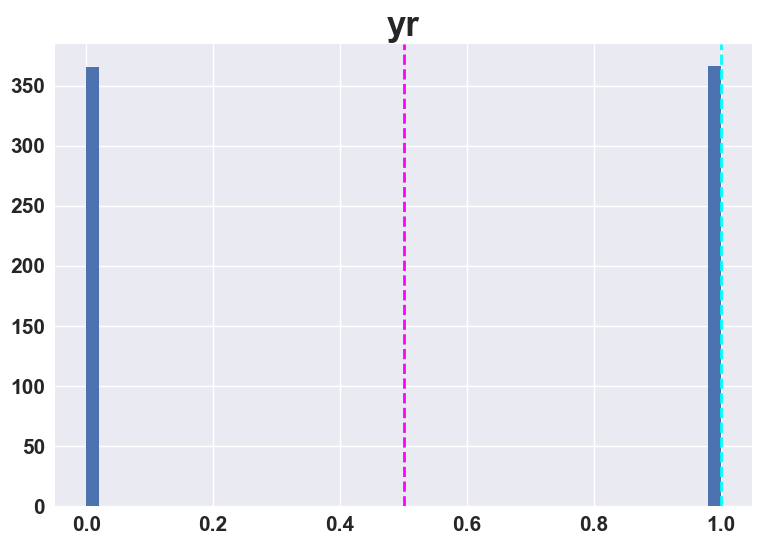

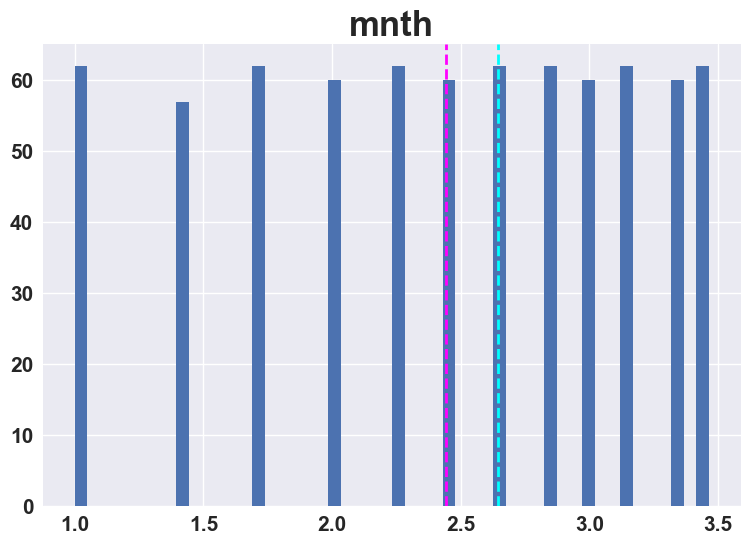

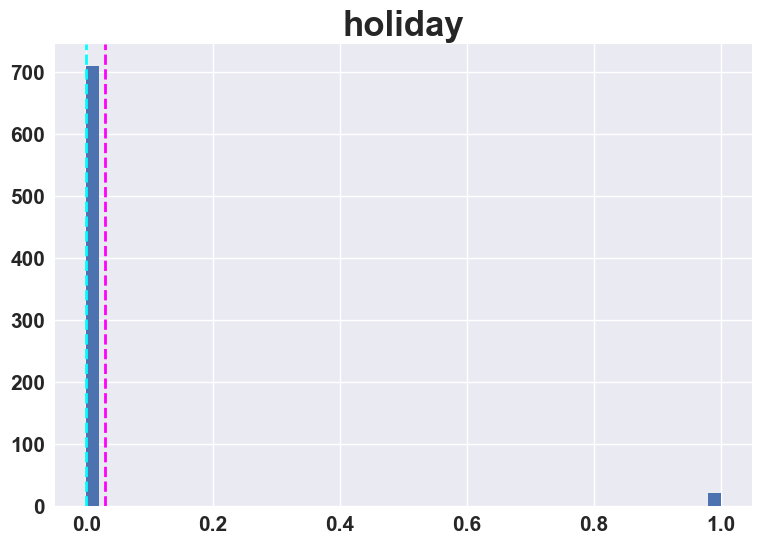

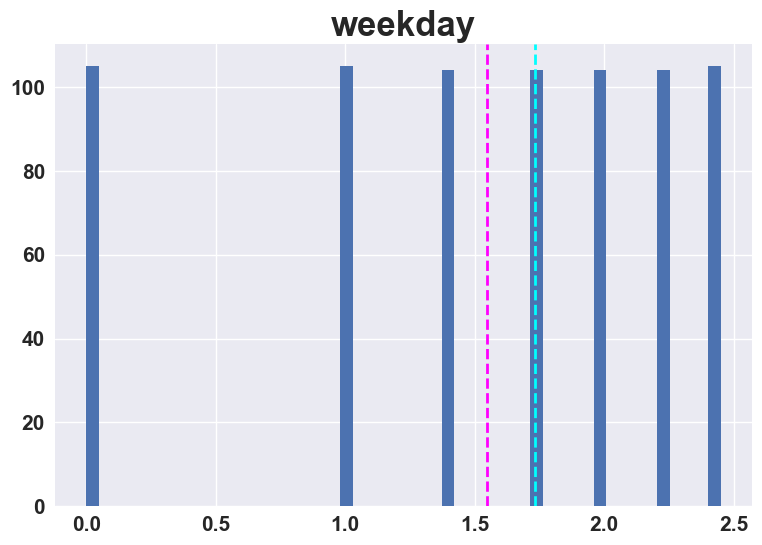

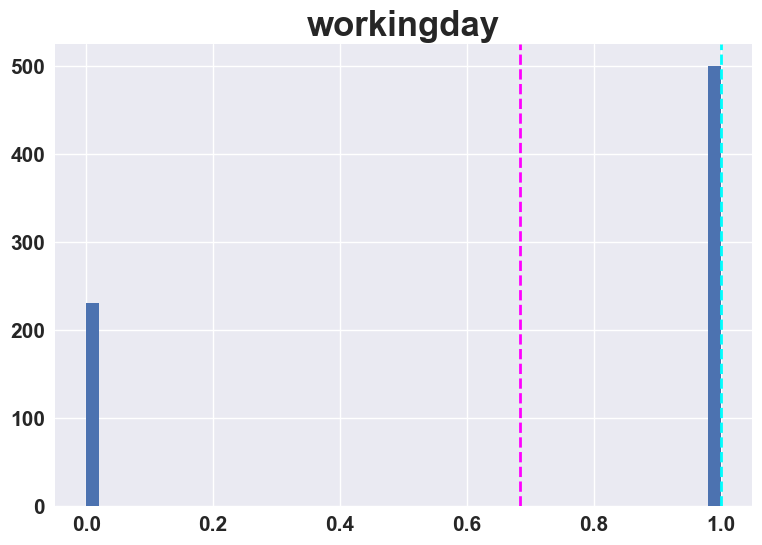

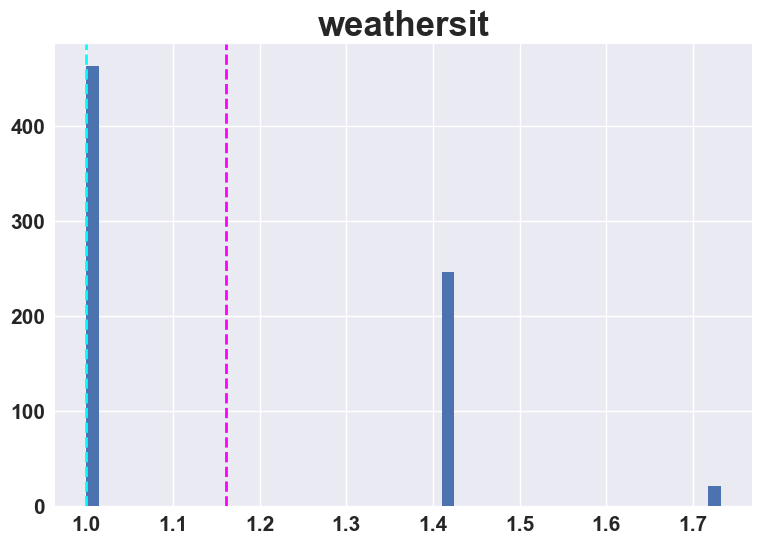

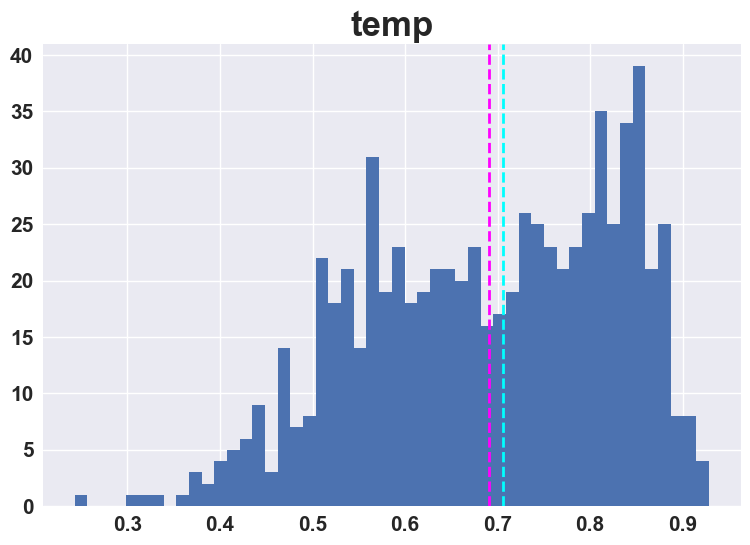

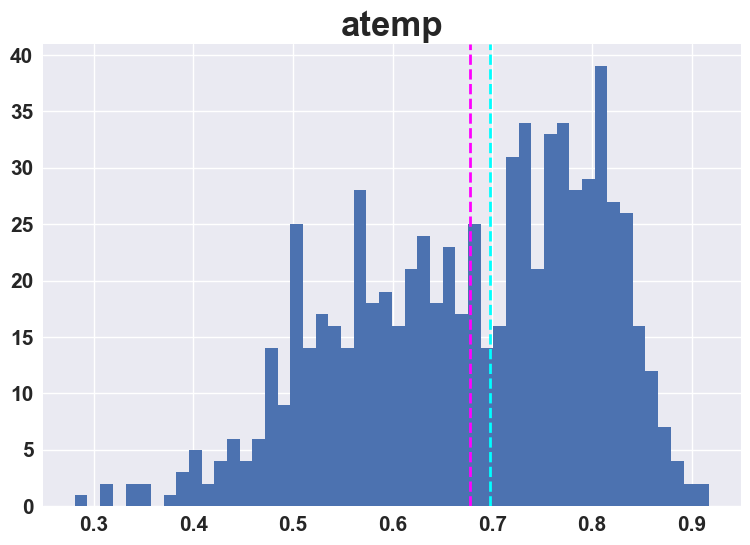

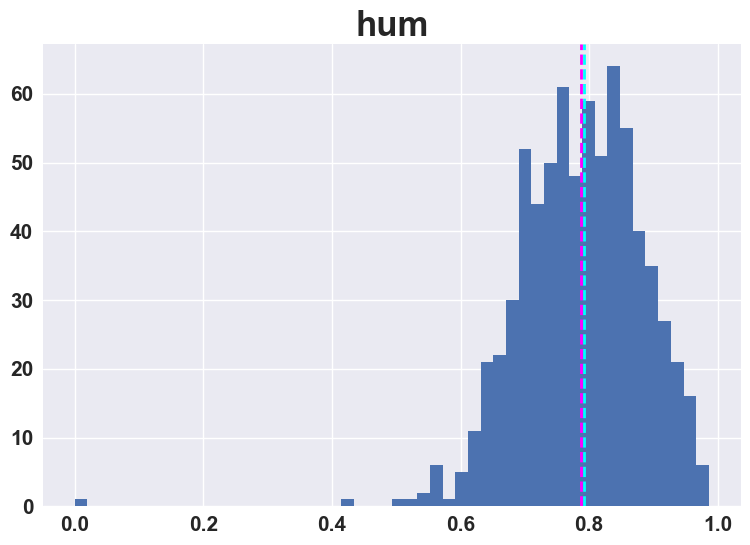

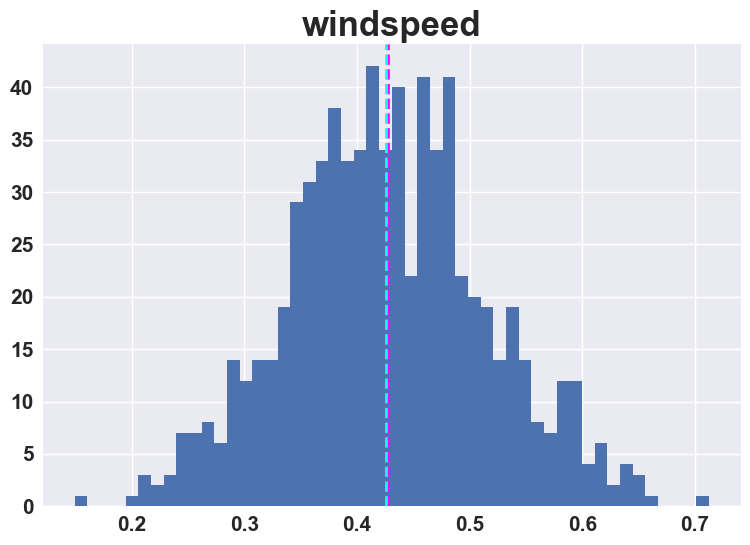

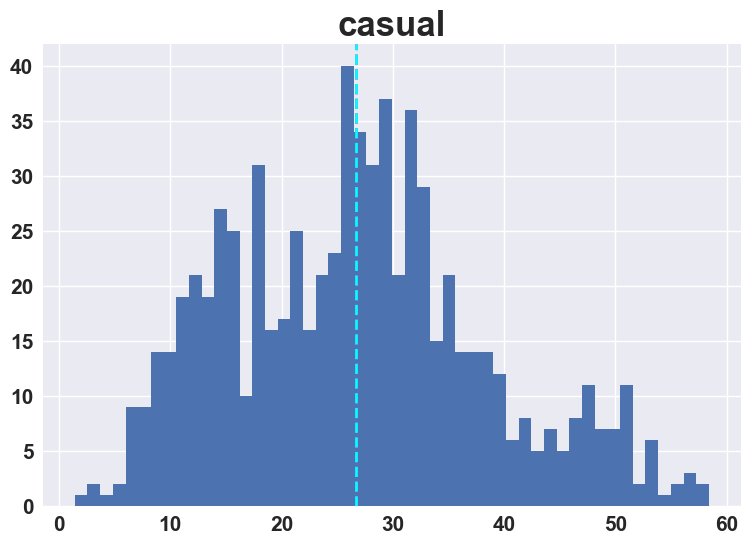

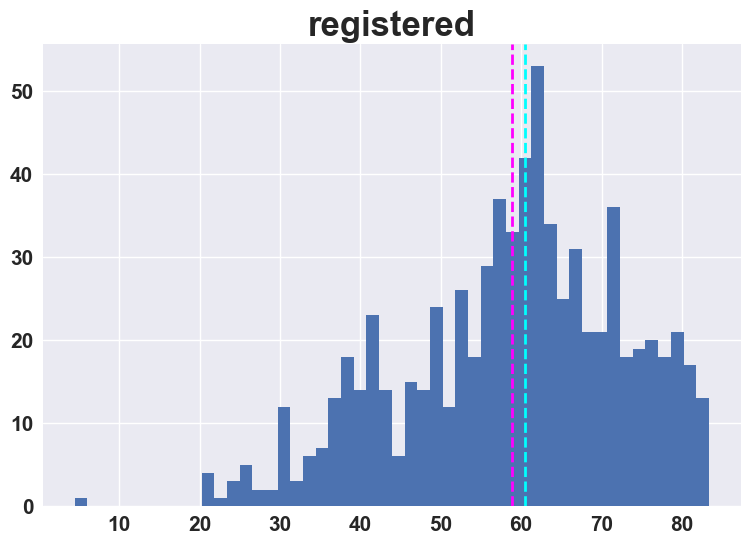

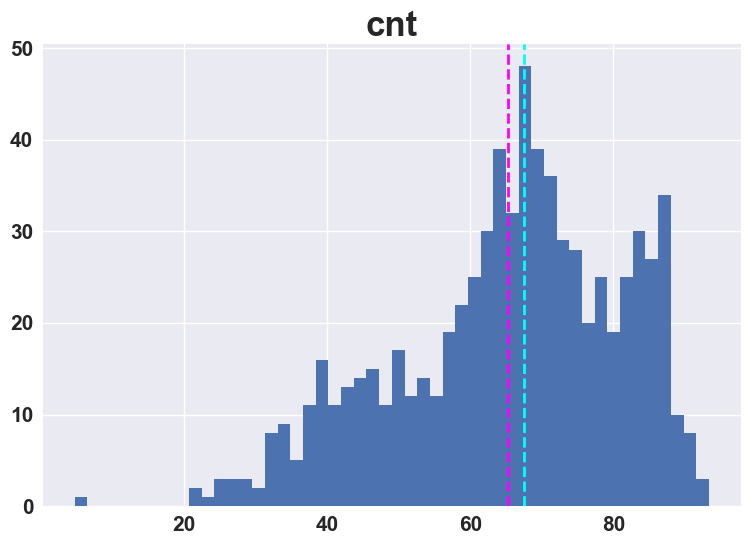

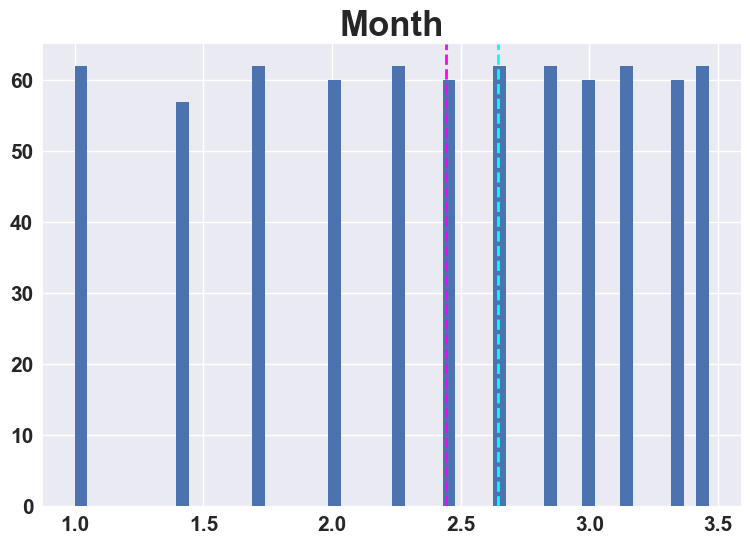

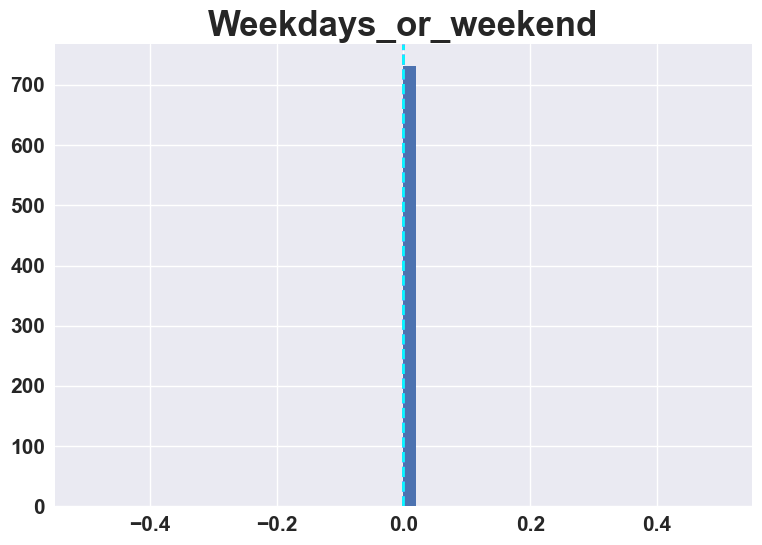

In [40]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis

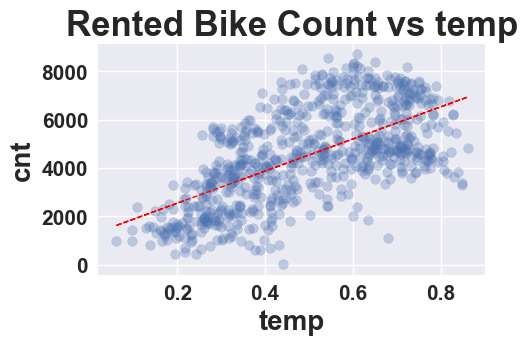

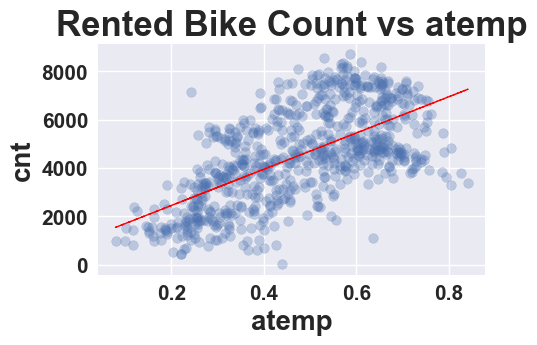

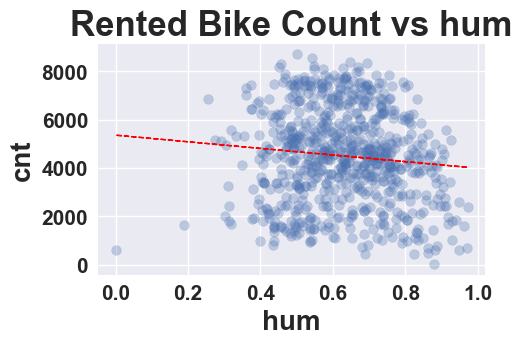

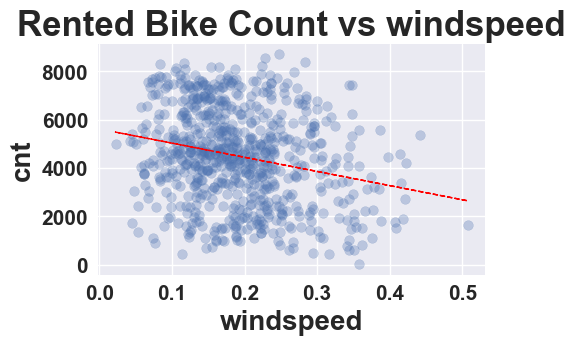

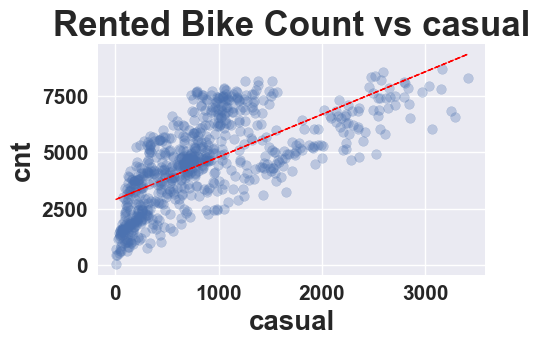

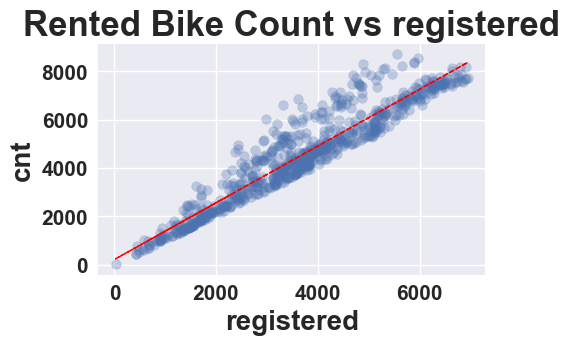

In [41]:
import numpy as np
import matplotlib.pyplot as plt

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

for col in numeric_cols:
    x = dataset[col]
    y = dataset['cnt']

    # Clean data
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    if len(np.unique(x)) > 1:
        try:
            # Fit linear regression line
            z = np.polyfit(x, y, 1)
            y_hat = np.poly1d(z)(x)

            plt.figure(figsize=(5, 3))
            plt.scatter(x, y, alpha=0.3)
            plt.plot(x, y_hat, "r--", lw=1)
            plt.title(f"Rented Bike Count vs {col}")
            plt.xlabel(col)
            plt.ylabel("cnt")
            plt.show()

        except np.linalg.LinAlgError:
            print(f"Skipping {col}: LinAlgError — SVD did not converge")
    else:
        print(f"Skipping {col}: no variation in data")


<Axes: >

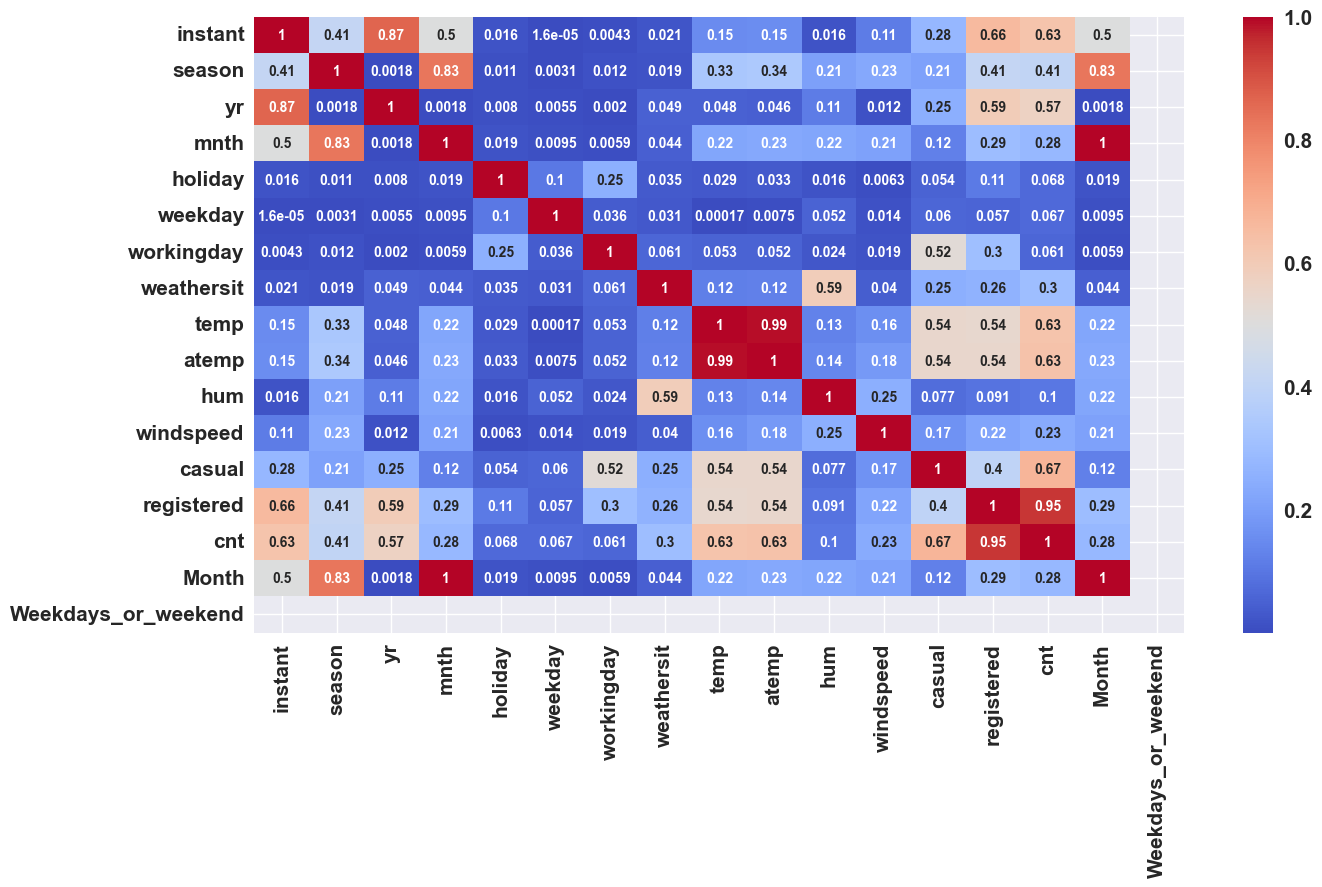

In [42]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [43]:
df = dataset.copy()

### Modeling

In [44]:
df.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0


In [45]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [47]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,instant,2206.726158
1,season,24.811676
2,yr,843.438636
3,mnth,inf
4,holiday,1.109992
5,weekday,3.266765
6,workingday,9.455066
7,weathersit,14.605775
8,temp,500.481280
9,atemp,579.043435


In [48]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [49]:
# Create dummy variables for the catgeorical variable Season
df['Spring'] = np.where(df['season'] == 'Spring', 1, 0)
df['Summer'] = np.where(df['season'] == 'Summer', 1, 0)
df['Autumn'] = np.where(df['season'] == 'Autumn', 1, 0)
df['Winter'] = np.where(df['season'] == 'Winter', 1, 0)

In [50]:
df.drop(columns=['season'],axis=1,inplace=True)

In [51]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [52]:
df['holiday'] = df['holiday'].map({'No Holiday':0, 'Holiday':1})

In [53]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [54]:
df['workingday'] = df['workingday'].map({'Yes':1, 'No':0})

In [55]:
df.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
0,1,0,1,NaN,6,NaN,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0,0,0
1,2,0,1,NaN,0,NaN,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,0,0
2,3,0,1,NaN,1,NaN,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0,0,0
3,4,0,1,NaN,2,NaN,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0,0,0
4,5,0,1,NaN,3,NaN,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   instant              731 non-null    int64  
 1   yr                   731 non-null    int64  
 2   mnth                 731 non-null    int64  
 3   holiday              0 non-null      float64
 4   weekday              731 non-null    int64  
 5   workingday           0 non-null      float64
 6   weathersit           731 non-null    int64  
 7   temp                 731 non-null    float64
 8   atemp                731 non-null    float64
 9   hum                  731 non-null    float64
 10  windspeed            731 non-null    float64
 11  casual               731 non-null    int64  
 12  registered           731 non-null    int64  
 13  cnt                  731 non-null    int64  
 14  Month                731 non-null    int32  
 15  Weekdays_or_weekend  731 non-null    int

### Linear Regression

In [57]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
# Creating a dependent variable for rented bike count
dependent_variable = 'Rented Bike Count'

In [59]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['atemp',
 'instant',
 'cnt',
 'workingday',
 'Winter',
 'Spring',
 'holiday',
 'weathersit',
 'hum',
 'Month',
 'Summer',
 'casual',
 'yr',
 'mnth',
 'registered',
 'windspeed',
 'Weekdays_or_weekend',
 'temp',
 'Autumn',
 'weekday']

In [60]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
X_train[0:10]

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
97,98,0,4,NaN,5,NaN,2,0.335833,0.324479,0.836250,0.226992,172,1299,4,0,0,0,0,0
503,504,1,5,NaN,5,NaN,1,0.564167,0.551121,0.523333,0.136817,1521,6118,5,0,0,0,0,0
642,643,1,10,NaN,4,NaN,2,0.657500,0.607975,0.722917,0.117546,891,6437,10,0,0,0,0,0
498,499,1,5,NaN,0,NaN,1,0.612500,0.585238,0.576250,0.225117,2172,3946,5,0,0,0,0,0
303,304,0,10,NaN,1,NaN,1,0.340000,0.356063,0.703333,0.106350,362,3307,10,0,0,0,0,0
570,571,1,7,NaN,2,NaN,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7,0,0,0,0,0
250,251,0,9,NaN,4,NaN,3,0.633913,0.555361,0.939565,0.192748,153,1689,9,0,0,0,0,0
17,18,0,1,NaN,2,NaN,2,0.216667,0.232333,0.861667,0.146775,9,674,1,0,0,0,0,0
595,596,1,8,NaN,6,NaN,1,0.678333,0.618071,0.603333,0.177867,2827,5038,8,0,0,0,0,0
240,241,0,8,NaN,1,NaN,1,0.636667,0.607958,0.554583,0.159825,729,3905,8,0,0,0,0,0


In [63]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 19)
(584,)
(147, 19)
(147,)


In [65]:
X_train[0:10]

array([[0.13287671, 0.        , 0.27272727,        nan, 0.83333333,
               nan, 0.5       , 0.35024023, 0.32839414, 0.80442593,
        0.48605788, 0.05181347, 0.18466647, 0.27272727, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.6890411 , 1.        , 0.36363636,        nan, 0.83333333,
               nan, 0.        , 0.63925722, 0.63167472, 0.35526299,
        0.24873701, 0.46296861, 0.88045048, 0.36363636, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.87945205, 1.        , 0.81818182,        nan, 0.66666667,
               nan, 0.5       , 0.75739478, 0.70775379, 0.64174706,
        0.19801995, 0.27095398, 0.92650881, 0.81818182, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.68219178, 1.        , 0.36363636,        nan, 0.        ,
               nan, 0.        , 0.7004354 , 0.67732832, 0.43122037,
        0.48112329, 0.66138372, 0.56684955, 0.36363636, 0.        ,
        0.   

In [66]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd

# Combine X_train and y_train to drop rows with any NaN
train_df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='target')], axis=1)
train_df = train_df.dropna()

# Separate back into X and y
X_train_clean = train_df.drop('target', axis=1).values
y_train_clean = train_df['target'].values

# Fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_clean, y_train_clean)


ValueError: Found array with 0 sample(s) (shape=(0, 19)) while a minimum of 1 is required by LinearRegression.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Fit Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
import pandas as pd

pd.DataFrame(X_train).isnull().sum()



0       0
1       0
2       0
3     584
4       0
5     584
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Convert X_train, X_test to DataFrame if they're numpy arrays
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Create imputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train & test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fit your model again
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Import required modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split data
X = dataset.drop('cnt', axis=1)   # Features
y = dataset['cnt']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Replace NaNs with column means
    ('scaler', StandardScaler()),                  # Normalize features
    ('regressor', LinearRegression())              # Fit linear regression
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 1.0
MAE: 9.961132447989215e-13
RMSE: 1.3228838074654798e-12


In [ ]:
# Cheeck coefficents
regressor.coef_

array([-4.09636747e-15,  9.92539384e-14,  1.15196589e-12,  1.69864123e-14,
        2.26270927e-13, -1.77859436e-14, -5.79950601e-14, -2.36058386e-13,
       -6.73810834e-13,  6.78609319e-13,  5.31656208e-13,  7.57545424e-13,
        1.00000000e+00,  1.00000000e+00,  1.69727513e-14,  0.00000000e+00])

In [ ]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
instant,-4.096367e-15
season,9.925394e-14
yr,1.151966e-12
mnth,1.698641e-14
holiday,2.262709e-13
weekday,-1.778594e-14
workingday,-5.799506e-14
weathersit,-2.360584e-13
temp,-6.738108e-13
atemp,6.786093e-13


In [ ]:
# Check intercept
regressor.intercept_

np.float64(2.7284841053187847e-12)

In [ ]:
# Checking score
regressor.score(X_train,y_train)

1.0

In [ ]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluation of test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 1.0634697959745472e-12.
The Mean Squred Error(MSE) is 1.533028106995822e-24.
The Root Mean Squared Error(RMSE) is 1.2381551223476895e-12.
The R2 Score is 1.0.
Adjusted R2 is 1.0.


In [ ]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [ ]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,0.0,0.0,0.0,1.0,1.0


In [ ]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [ ]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

NameError: name 'plot_Pred_vs_actual' is not defined

Text(0.5, 0, 'y_predicted')

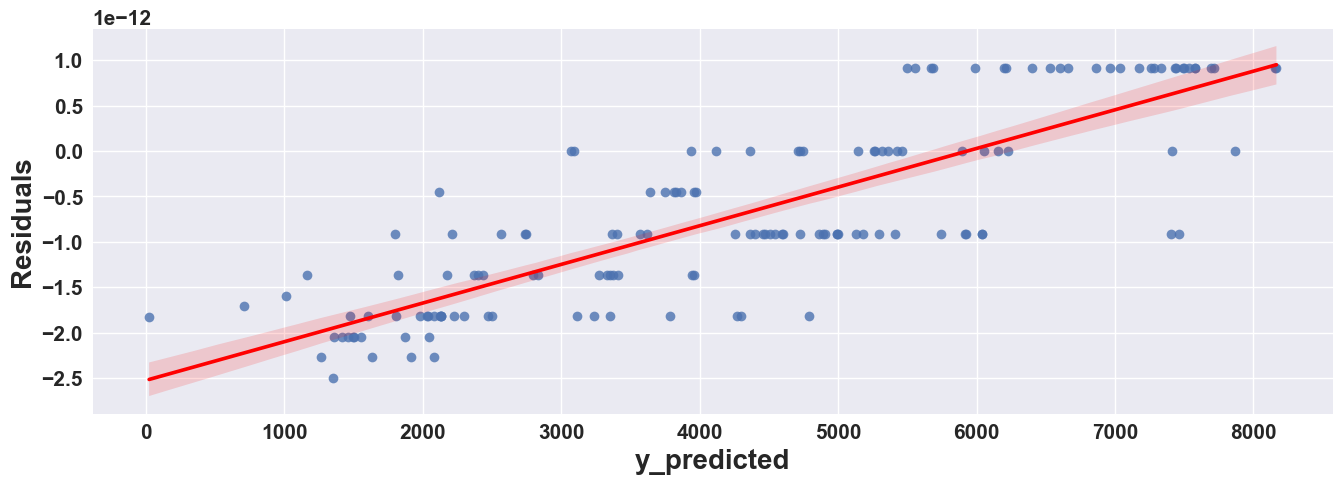

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

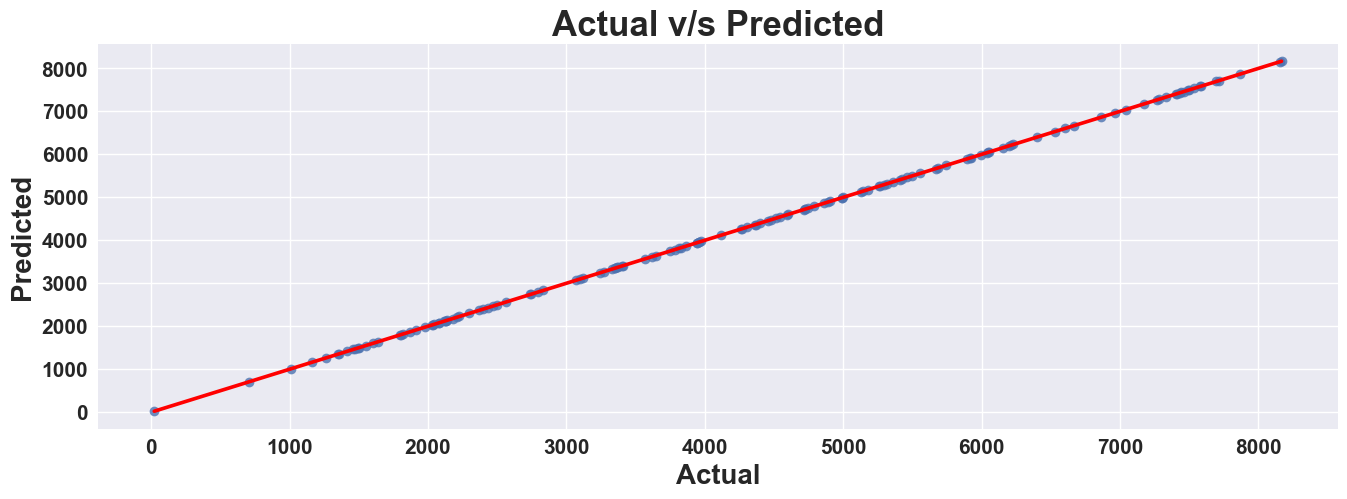

In [ ]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

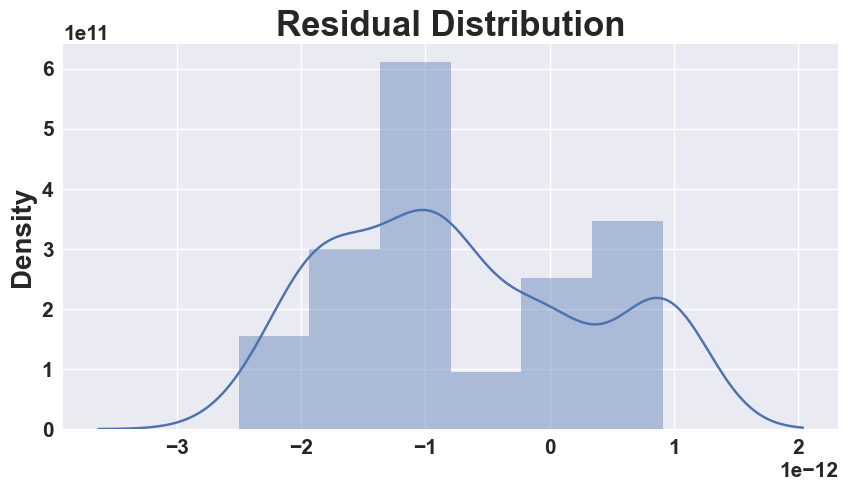

In [ ]:
Residual_distPlot(y_pred,y_test)

### Lasso

In [ ]:
# Initiating
lasso_reg = Lasso(alpha = 0.01)

In [ ]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [ ]:
from sklearn.impute import SimpleImputer

# Replace NaNs with column mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  # adjust alpha if needed
lasso_reg.fit(X_train_imputed, y_train)

# Make predictions
y_pred = lasso_reg.predict(X_test_imputed)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # scales features for Lasso
    ('lasso', Lasso(alpha=0.1))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Pipeline: Impute -> Scale -> Lasso
lasso_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # handles NaNs
    ('scaler', StandardScaler()),                # optional but recommended
    ('lasso', Lasso(alpha=0.1))
])

lasso_pipeline.fit(X_train, y_train)
y_pred = lasso_pipeline.predict(X_test)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Create a pipeline: Impute missing values -> scale features -> Lasso regression
lasso_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # replace NaNs with column mean
    ('scaler', StandardScaler()),                # optional but recommended for Lasso
    ('lasso', Lasso(alpha=0.1))                  # adjust alpha as needed
])

# Fit the model
lasso_pipeline.fit(X_train, y_train)

# Predict
y_pred = lasso_pipeline.predict(X_test)


In [ ]:
# Check coefficient
lasso_reg.coef_

array([ 0.00000000e+00, -0.00000000e+00,  1.86486543e-01, -0.00000000e+00,
       -3.55546356e-01,  0.00000000e+00,  1.95253063e+00, -0.00000000e+00,
       -0.00000000e+00,  2.25884813e+01,  5.39471452e+01,  5.79665193e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])


In [ ]:
lasso_reg.fit(X_train, y_train)
pd.DataFrame(lasso_reg.coef_, index=X_train.columns, columns=['Coefficients'])


,Coefficients
Feature_0,0.000000
Feature_1,-0.000000
Feature_2,0.186487
Feature_3,-0.000000
Feature_4,-0.355546
Feature_5,0.000000
Feature_6,1.952531
Feature_7,-0.000000
Feature_8,-0.000000
Feature_9,22.588481


In [ ]:
# Check intercept
lasso_reg.intercept_

np.float64(30.105138088063683)

In [ ]:
# Checking score
lasso_reg.score(X_train,y_train)

0.9750001678342104

In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 1.8096483914816308.
 The Mean Squred Error(MSE) is 5.819357246699099.
The Root Mean Squared Error(RMSE) is 2.4123343977772027.
The R2 Score is 0.9795133511872032.
Adjusted R2 is 0.9764484194750525.


In [ ]:
# Create test results dictionary
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [ ]:
test_results_df = test_results_df.append(test_dict,ignore_index=True)
test_results_df

NameError: name 'test_results_df' is not defined

In [ ]:
import pandas as pd

# Initialize test_results_df if it doesn't exist
if 'test_results_df' not in locals():
    test_results_df = pd.DataFrame()

# Convert your test_dict to a one-row DataFrame and concatenate
test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

# Display the updated DataFrame
test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,1.8096,5.8194,2.4123,0.9795,0.9764


In [ ]:
# cross validation on Lasso regression
# creating object
lasso_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
lasso_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [ ]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -5.842498062381384


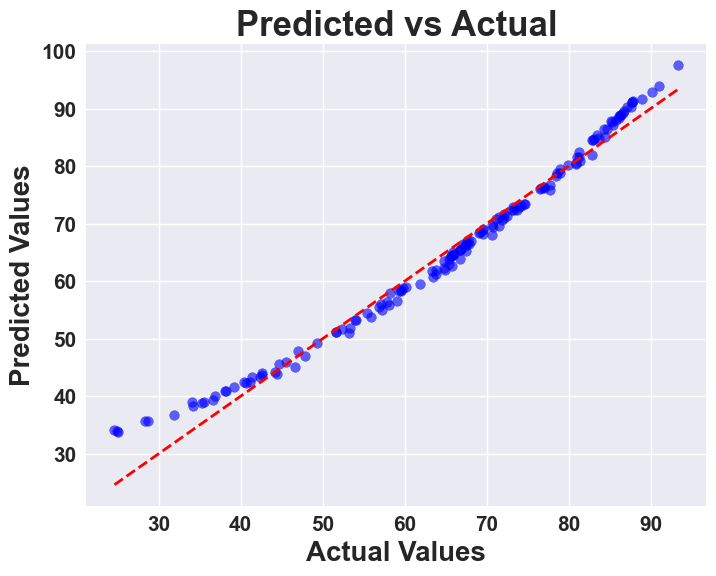

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

In [ ]:
import matplotlib.pyplot as plt

def plot_Pred_vs_actual(y_pred, y_test):
    """
    Scatter plot comparing predicted vs actual values for regression.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    # 45-degree line for perfect prediction
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual")
    plt.grid(True)
    plt.show()


Text(0.5, 0, 'y_predicted')

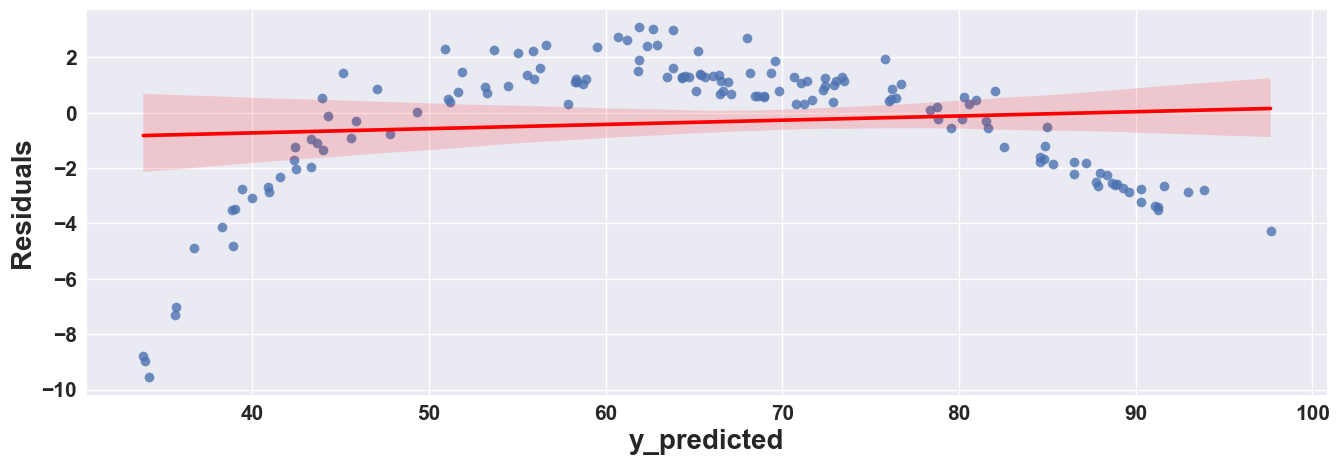

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

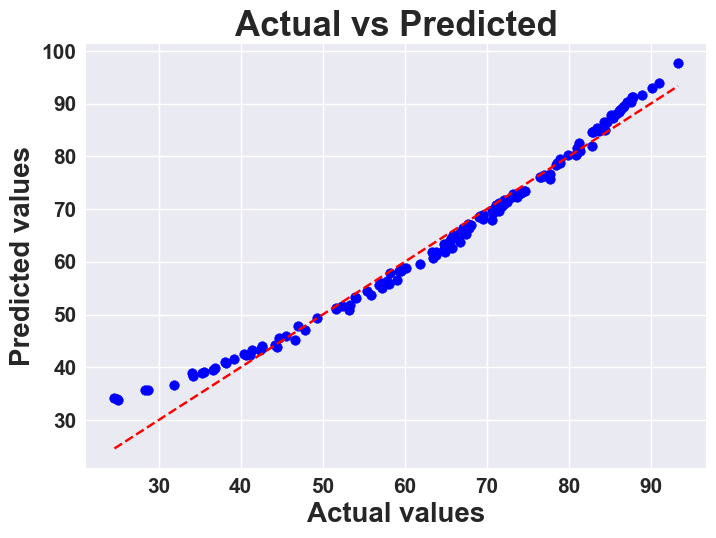

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def Residual_distPlot(y_pred, y_true):
    residuals = y_true - y_pred
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()



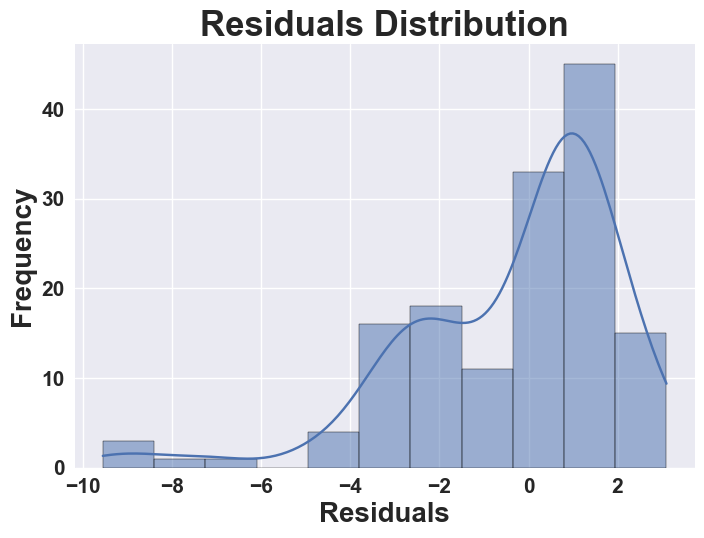

In [ ]:
Residual_distPlot(y_pred, y_test)


### Ridge

In [ ]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [ ]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
# Check coefficient
ridge_reg.coef_

array([-23.68305747,  10.69718328,   5.72297572,  -0.43103047,
        -0.7995685 ,  -4.87878938,   6.62625933,  -0.50103831,
        -0.20613266,  24.3772229 ,  56.819699  ,   5.72297572,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])

In [ ]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

ValueError: Shape of passed values is (17, 1), indices imply (19, 1)

In [ ]:
# Example: If you used X_train to fit the model
pd.DataFrame(ridge_reg.coef_, X_train.columns, columns=['Coeficients'])


,Coeficients
Feature_0,-23.683057
Feature_1,10.697183
Feature_2,5.722976
Feature_3,-0.431030
Feature_4,-0.799569
Feature_5,-4.878789
Feature_6,6.626259
Feature_7,-0.501038
Feature_8,-0.206133
Feature_9,24.377223


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# If using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
pd.DataFrame(ridge_reg.coef_, columns=poly.get_feature_names_out(X_train.columns))


ValueError: Shape of passed values is (17, 1), indices imply (17, 170)

In [ ]:
pd.DataFrame(ridge_reg.coef_, X_train.columns, columns=['Coefficients'])


,Coefficients
Feature_0,-23.683057
Feature_1,10.697183
Feature_2,5.722976
Feature_3,-0.431030
Feature_4,-0.799569
Feature_5,-4.878789
Feature_6,6.626259
Feature_7,-0.501038
Feature_8,-0.206133
Feature_9,24.377223


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Train Ridge on polynomial features
ridge_poly = Ridge(alpha=1.0)
ridge_poly.fit(X_poly, y_train)

# Get coefficient dataframe
coef_df = pd.DataFrame(ridge_poly.coef_, 
                       index=poly.get_feature_names_out(X_train.columns), 
                       columns=['Coefficients'])


In [ ]:
# Check intercept
ridge_reg.intercept_

np.float64(29.817187682176893)

In [ ]:
# Checking score
ridge_reg.score(X_train,y_train)

0.9781929870663463

In [ ]:
y_pred = ridge_reg.predict(X_test_imputed)
y_pred_train = ridge_reg.predict(X_train_imputed)


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 1.8531980194979496.
 The Mean Squred Error(MSE) is 6.058624271662735.
The Root Mean Squared Error(RMSE) is 2.461427283439983.
The R2 Score is 0.9786710280052585.
Adjusted R2 is 0.9754800794391161.


In [ ]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [ ]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2,R2
0,Lasso,1.8096,5.8194,2.4123,0.9795,0.9764,NaN
1,Ridge,NaN,NaN,12.3000,NaN,NaN,0.85
2,Ridge,NaN,NaN,12.3000,NaN,NaN,0.85
3,Ridge,NaN,NaN,12.3000,NaN,NaN,0.85


In [ ]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


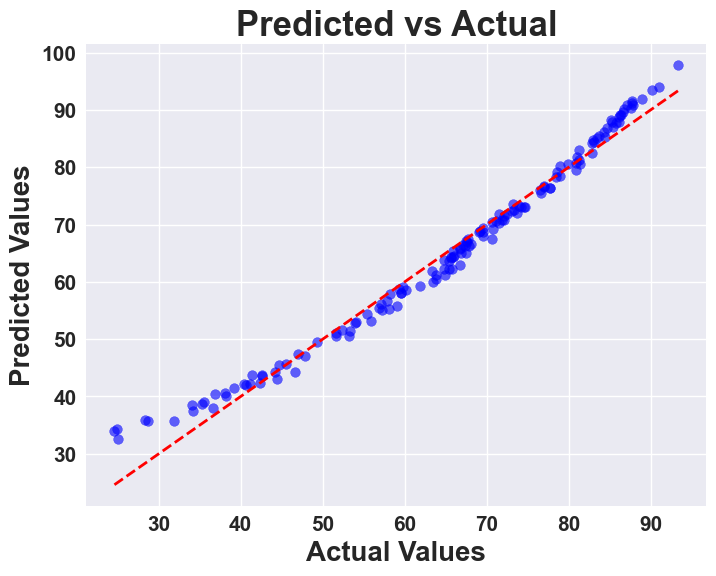

In [ ]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

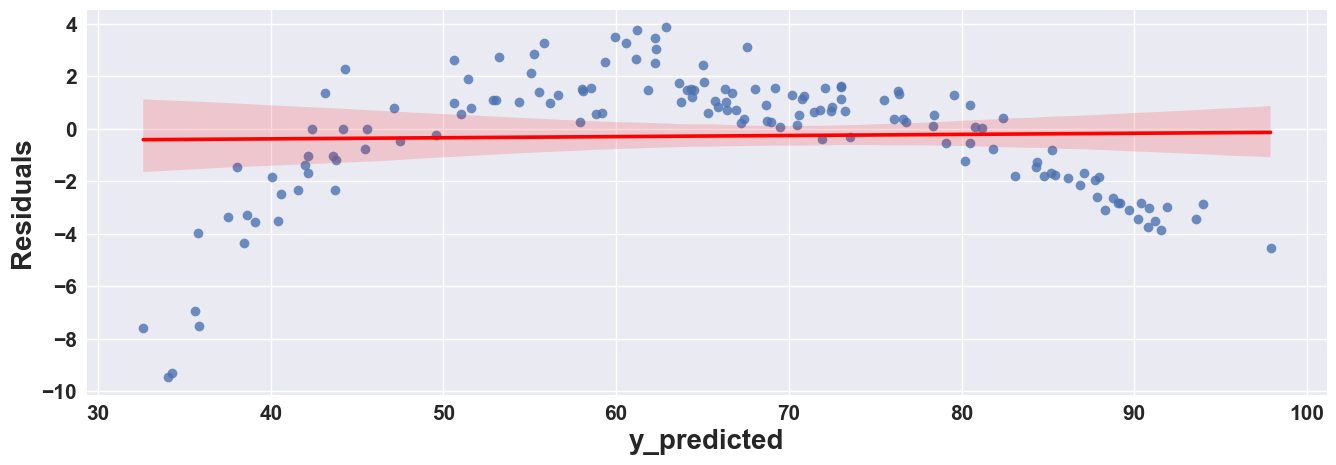

In [ ]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(y_pred, y_test):
    """
    Function to visualize how close the predicted values are to actual values.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.title("Actual vs Predicted Values", fontsize=14)
    # Plot regression line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.show()


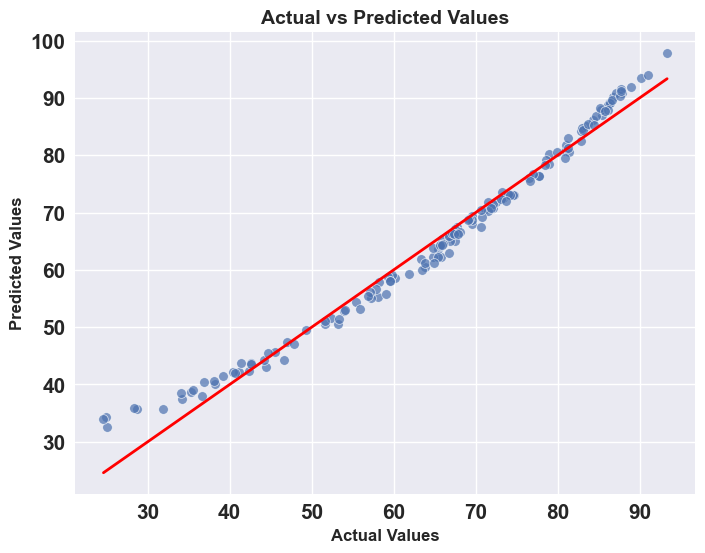

In [ ]:
plot_scatter(y_pred, y_test)


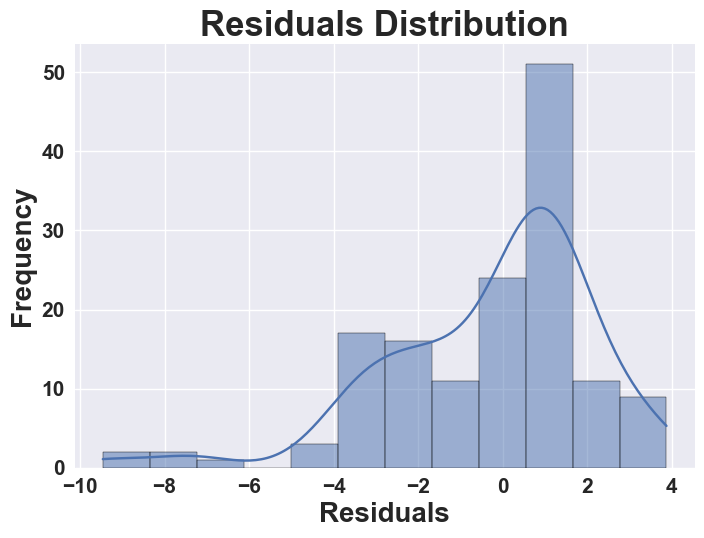

In [ ]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

### Elastic Net

In [70]:
# creating object of elastic net
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [68]:
import pandas as pd

# Check missing values
pd.DataFrame(X_train).isnull().sum()


0       0
1       0
2       0
3     584
4       0
5     584
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
dtype: int64

In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median' if data is skewed

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [71]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.9787545183186742

In [72]:
# predicting Y train values from train data set
y_pred_train = elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred = elastic_net_reg.predict(X_test)

In [73]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 1.8502466233863006.
The Mean Squred Error(MSE) is 6.034908340138516.
The Root Mean Squared Error(RMSE) is 2.4566050435791498.
The R2 Score is 0.9787545183186742.
Adjusted R2 is 0.9759547261591197.


In [74]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}